---

# Data Dictionary

Variable|Definition|Key
-|-|-
survival|Survival|0 = No, 1 = Yes
pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd
sex|Sex| 
Age|Age|in years	
sibsp|of siblings / spouses aboard the Titanic|Братьев и сестер/супругов на борту Титаника
parch|of parents / children aboard the Titanic|Количество родителей/детей на борту Титаника
ticket|Ticket number| 
fare|Passenger fare|	
cabin|Cabin number|	
embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton

---

In [1]:
import pandas as pd
import numpy as np

import time

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme (style = 'darkgrid')

---

***Сначала загрузим все данные***

---

In [2]:
train = pd.read_csv('data/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test = pd.read_csv('data/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
surv = pd.read_csv('data/gender_submission.csv')
surv

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


---

Теперь посмотрим пропуски и информацию по всем данным

---

In [5]:
def info(df, full = True, null = True, colmn = [], number_unique = 123):
    '''
    Посмотреть информацию по DataFrame
    -----------------------------------------------
    df   - Указать DataFrame
    
    full - Если True выводиться полная информация
           Если False выводится краткая таблица
           
    null - Если True выводиться информация по всем колонкам
           Если False выводится краткая таблица
    
    colmn  - 
    
    number_unique -    
    -----------------------------------------------
    '''
    
    inf = pd.DataFrame(columns = ['Колонка', 'Кол-во уникальных значений',
                                  'Кол-во дубликатов', 'Кол-во пропусков',
                                  '% пропусков', 'Тип данных'])
    col = []
    uni = []
    dub = []
    prop = []
    pr_prop = []
    typ = []
    
    for c in df:
        col.append(c)
        uni.append(len(df[c].unique()))
        dub.append(df[c].duplicated().sum())
        prop.append(df[c].isna().sum())
        pr_prop.append(round(100 * df[c].isna().sum() / len(df), 2))
        typ.append(df.dtypes[c])
                   
    inf['Колонка'] = col
    inf['Кол-во уникальных значений'] = uni
    inf['Кол-во дубликатов'] = dub
    inf['Кол-во пропусков'] = prop
    inf['% пропусков'] = pr_prop
    inf['Тип данных'] = typ
    inf0 = inf[inf['Кол-во пропусков'] != 0]
    
    if full == 0:
        
        if null == 1:
            print('----------------------------------------------------------------------------------------\nКоличество данных      -',
                  len(df))
            print('----------------------------------------------------------------------------------------\nКоличество дубликатов  -',
                  df.duplicated().sum())
            print('----------------------------------------------------------------------------------------')
            display(inf)
        
        elif null == 0:
            print('----------------------------------------------------------------------------------------\nКоличество данных      -',
                  len(df))
            print('----------------------------------------------------------------------------------------\nКоличество дубликатов  -',
                  df.duplicated().sum())
            print('----------------------------------------------------------------------------------------')
            display(inf0)
            
    
    elif full == 1:
        
        if null == 1:
            print('----------------------------------------------------------------------------------------\nКоличество данных      -',
                  len(df))
            print('----------------------------------------------------------------------------------------\nКоличество дубликатов  -',
                  df.duplicated().sum())
            
            for i in inf.index:
                print('----------------------------------------------------------------------------------------')
                display(inf.loc[[i]])
                print('Уникальные значения:\n')
               
                if inf.loc[i]['Колонка'] not in colmn:
                    if number_unique == 0:

                        if df.dtypes[inf.loc[i]['Колонка']] == object:
                            print(sorted(df[inf.loc[i]['Колонка']].unique(), key=str))
                        else:
                            print(np.sort(df[inf.loc[i]['Колонка']].unique()))
                            
                    elif len(df[inf.loc[i]['Колонка']].unique()) <= number_unique:

                        if df.dtypes[inf.loc[i]['Колонка']] == object:
                            print(sorted(df[inf.loc[i]['Колонка']].unique(), key=str))
                        else:
                            print(np.sort(df[inf.loc[i]['Колонка']].unique()))
                    else:
                        print('Уникальные значения по данной колонке не выводятся,\nт.к. их более:',
                              number_unique, '(параметр - number_unique).')
                            
                else:
                    print('Уникальные значения по данной колонке не выводятся,\nт.к. колонка -', 
                          inf.loc[i]['Колонка'], 'указана в параметре colmn.')
                    
      
        elif null == 0:
            print('----------------------------------------------------------------------------------------\nКоличество данных      -',
                  len(df))
            print('----------------------------------------------------------------------------------------\nКоличество дубликатов  -',
                  df.duplicated().sum())
            
            for i in inf0.index:
                print('----------------------------------------------------------------------------------------')
                display(inf0.loc[[i]])
                print('Уникальные значения:\n')
                
                if inf0.loc[i]['Колонка'] not in colmn:
                    if number_unique == 0:

                        if df.dtypes[inf0.loc[i]['Колонка']] == object:
                            print(sorted(df[inf0.loc[i]['Колонка']].unique(), key=str))
                        else:
                            print(np.sort(df[inf0.loc[i]['Колонка']].unique()))
                    
                    elif len(df[inf0.loc[i]['Колонка']].unique()) <= number_unique:

                        if df.dtypes[inf0.loc[i]['Колонка']] == object:
                            print(sorted(df[inf0.loc[i]['Колонка']].unique(), key=str))
                        else:
                            print(np.sort(df[inf0.loc[i]['Колонка']].unique()))
                    else:
                        print('Уникальные значения по данной колонке не выводятся,\nт.к. их более:',
                              number_unique, '(параметр - number_unique).')
                            
                else:
                    print('Уникальные значения по данной колонке не выводятся,\nт.к. колонка -', 
                          inf.loc[i]['Колонка'], 'указана в параметре colmn.')

In [6]:
info(df = train, full = True, null = True, colmn = ['PassengerId', 'Name'], number_unique = 0)

----------------------------------------------------------------------------------------
Количество данных      - 891
----------------------------------------------------------------------------------------
Количество дубликатов  - 0
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
0,PassengerId,891,0,0,0.0,int64


Уникальные значения:

Уникальные значения по данной колонке не выводятся,
т.к. колонка - PassengerId указана в параметре colmn.
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
1,Survived,2,889,0,0.0,int64


Уникальные значения:

[0 1]
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
2,Pclass,3,888,0,0.0,int64


Уникальные значения:

[1 2 3]
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
3,Name,891,0,0,0.0,object


Уникальные значения:

Уникальные значения по данной колонке не выводятся,
т.к. колонка - Name указана в параметре colmn.
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
4,Sex,2,889,0,0.0,object


Уникальные значения:

['female', 'male']
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
5,Age,89,802,177,19.87,float64


Уникальные значения:

[ 0.42  0.67  0.75  0.83  0.92  1.    2.    3.    4.    5.    6.    7.
  8.    9.   10.   11.   12.   13.   14.   14.5  15.   16.   17.   18.
 19.   20.   20.5  21.   22.   23.   23.5  24.   24.5  25.   26.   27.
 28.   28.5  29.   30.   30.5  31.   32.   32.5  33.   34.   34.5  35.
 36.   36.5  37.   38.   39.   40.   40.5  41.   42.   43.   44.   45.
 45.5  46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   55.5
 56.   57.   58.   59.   60.   61.   62.   63.   64.   65.   66.   70.
 70.5  71.   74.   80.     nan]
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
6,SibSp,7,884,0,0.0,int64


Уникальные значения:

[0 1 2 3 4 5 8]
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
7,Parch,7,884,0,0.0,int64


Уникальные значения:

[0 1 2 3 4 5 6]
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
8,Ticket,681,210,0,0.0,object


Уникальные значения:

['110152', '110413', '110465', '110564', '110813', '111240', '111320', '111361', '111369', '111426', '111427', '111428', '112050', '112052', '112053', '112058', '112059', '112277', '112379', '113028', '113043', '113050', '113051', '113055', '113056', '113059', '113501', '113503', '113505', '113509', '113510', '113514', '113572', '113760', '113767', '113773', '113776', '113781', '113783', '113784', '113786', '113787', '113788', '113789', '113792', '113794', '113796', '113798', '113800', '113803', '113804', '113806', '113807', '11668', '11751', '11752', '11753', '11755', '11765', '11767', '11769', '11771', '11774', '11813', '11967', '12233', '12460', '12749', '13049', '13213', '13214', '13502', '13507', '13509', '13567', '13568', '14311', '14312', '14313', '14973', '1601', '16966', '16988', '17421', '17453', '17463', '17464', '17465', '17466', '17474', '17764', '19877', '19928', '19943', '19947', '19950', '19952', '19972', '19988', '19996', '2003', '211536', '21440'

,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
9,Fare,248,643,0,0.0,float64


Уникальные значения:

[  0.       4.0125   5.       6.2375   6.4375   6.45     6.4958   6.75
   6.8583   6.95     6.975    7.0458   7.05     7.0542   7.125    7.1417
   7.225    7.2292   7.25     7.3125   7.4958   7.5208   7.55     7.6292
   7.65     7.725    7.7292   7.7333   7.7375   7.7417   7.75     7.775
   7.7875   7.7958   7.8      7.8292   7.8542   7.875    7.8792   7.8875
   7.8958   7.925    8.0292   8.05     8.1125   8.1375   8.1583   8.3
   8.3625   8.4042   8.4333   8.4583   8.5167   8.6542   8.6625   8.6833
   8.7125   8.85     9.       9.2167   9.225    9.35     9.475    9.4833
   9.5      9.5875   9.825    9.8375   9.8417   9.8458  10.1708  10.4625
  10.5     10.5167  11.1333  11.2417  11.5     12.      12.275   12.2875
  12.35    12.475   12.525   12.65    12.875   13.      13.4167  13.5
  13.7917  13.8583  13.8625  14.      14.1083  14.4     14.4542  14.4583
  14.5     15.      15.0458  15.05    15.1     15.2458  15.5     15.55
  15.7417  15.75    15.85    15.9     16

,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
10,Cabin,148,743,687,77.1,object


Уникальные значения:

['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31', 'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18', 'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38', 'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55', 'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78', 'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103', 'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125', 'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30', 'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64', 'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86', 'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12', 'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30', 'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49', 'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121', 'E17', 'E24', 'E25', 'E31', 'E33', 'E34', 'E36', 'E38', 'E40', 'E44', 'E46', 'E49', 'E50

,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
11,Embarked,4,887,2,0.22,object


Уникальные значения:

['C', 'Q', 'S', nan]


In [7]:
info(test, False)

----------------------------------------------------------------------------------------
Количество данных      - 418
----------------------------------------------------------------------------------------
Количество дубликатов  - 0
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
0,PassengerId,418,0,0,0.00,int64
1,Pclass,3,415,0,0.00,int64
2,Name,418,0,0,0.00,object
3,Sex,2,416,0,0.00,object
4,Age,80,338,86,20.57,float64
5,SibSp,7,411,0,0.00,int64
6,Parch,8,410,0,0.00,int64
7,Ticket,363,55,0,0.00,object
8,Fare,170,248,1,0.24,float64
9,Cabin,77,341,327,78.23,object


In [8]:
info(test)

----------------------------------------------------------------------------------------
Количество данных      - 418
----------------------------------------------------------------------------------------
Количество дубликатов  - 0
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
0,PassengerId,418,0,0,0.0,int64


Уникальные значения:

Уникальные значения по данной колонке не выводятся,
т.к. их более: 123 (параметр - number_unique).
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
1,Pclass,3,415,0,0.0,int64


Уникальные значения:

[1 2 3]
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
2,Name,418,0,0,0.0,object


Уникальные значения:

Уникальные значения по данной колонке не выводятся,
т.к. их более: 123 (параметр - number_unique).
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
3,Sex,2,416,0,0.0,object


Уникальные значения:

['female', 'male']
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
4,Age,80,338,86,20.57,float64


Уникальные значения:

[ 0.17  0.33  0.75  0.83  0.92  1.    2.    3.    5.    6.    7.    8.
  9.   10.   11.5  12.   13.   14.   14.5  15.   16.   17.   18.   18.5
 19.   20.   21.   22.   22.5  23.   24.   25.   26.   26.5  27.   28.
 28.5  29.   30.   31.   32.   32.5  33.   34.   34.5  35.   36.   36.5
 37.   38.   38.5  39.   40.   40.5  41.   42.   43.   44.   45.   46.
 47.   48.   49.   50.   51.   53.   54.   55.   57.   58.   59.   60.
 60.5  61.   62.   63.   64.   67.   76.     nan]
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
5,SibSp,7,411,0,0.0,int64


Уникальные значения:

[0 1 2 3 4 5 8]
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
6,Parch,8,410,0,0.0,int64


Уникальные значения:

[0 1 2 3 4 5 6 9]
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
7,Ticket,363,55,0,0.0,object


Уникальные значения:

Уникальные значения по данной колонке не выводятся,
т.к. их более: 123 (параметр - number_unique).
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
8,Fare,170,248,1,0.24,float64


Уникальные значения:

Уникальные значения по данной колонке не выводятся,
т.к. их более: 123 (параметр - number_unique).
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
9,Cabin,77,341,327,78.23,object


Уникальные значения:

['A11', 'A18', 'A21', 'A29', 'A34', 'A9', 'B10', 'B11', 'B24', 'B26', 'B36', 'B41', 'B45', 'B51 B53 B55', 'B52 B54 B56', 'B57 B59 B63 B66', 'B58 B60', 'B61', 'B69', 'B71', 'B78', 'C101', 'C105', 'C106', 'C116', 'C130', 'C132', 'C22 C26', 'C23 C25 C27', 'C28', 'C31', 'C32', 'C39', 'C46', 'C51', 'C53', 'C54', 'C55 C57', 'C6', 'C62 C64', 'C7', 'C78', 'C80', 'C85', 'C86', 'C89', 'C97', 'D', 'D10 D12', 'D15', 'D19', 'D21', 'D22', 'D28', 'D30', 'D34', 'D37', 'D38', 'D40', 'D43', 'E31', 'E34', 'E39 E41', 'E45', 'E46', 'E50', 'E52', 'E60', 'F', 'F E46', 'F E57', 'F G63', 'F2', 'F33', 'F4', 'G6', nan]
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
10,Embarked,3,415,0,0.0,object


Уникальные значения:

['C', 'Q', 'S']


In [9]:
info(surv)

----------------------------------------------------------------------------------------
Количество данных      - 418
----------------------------------------------------------------------------------------
Количество дубликатов  - 0
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
0,PassengerId,418,0,0,0.0,int64


Уникальные значения:

Уникальные значения по данной колонке не выводятся,
т.к. их более: 123 (параметр - number_unique).
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
1,Survived,2,416,0,0.0,int64


Уникальные значения:

[0 1]


In [10]:
info(train, 0)

----------------------------------------------------------------------------------------
Количество данных      - 891
----------------------------------------------------------------------------------------
Количество дубликатов  - 0
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
0,PassengerId,891,0,0,0.00,int64
1,Survived,2,889,0,0.00,int64
2,Pclass,3,888,0,0.00,int64
3,Name,891,0,0,0.00,object
4,Sex,2,889,0,0.00,object
5,Age,89,802,177,19.87,float64
6,SibSp,7,884,0,0.00,int64
7,Parch,7,884,0,0.00,int64
8,Ticket,681,210,0,0.00,object
9,Fare,248,643,0,0.00,float64


In [11]:
info(test, 0)

----------------------------------------------------------------------------------------
Количество данных      - 418
----------------------------------------------------------------------------------------
Количество дубликатов  - 0
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
0,PassengerId,418,0,0,0.00,int64
1,Pclass,3,415,0,0.00,int64
2,Name,418,0,0,0.00,object
3,Sex,2,416,0,0.00,object
4,Age,80,338,86,20.57,float64
5,SibSp,7,411,0,0.00,int64
6,Parch,8,410,0,0.00,int64
7,Ticket,363,55,0,0.00,object
8,Fare,170,248,1,0.24,float64
9,Cabin,77,341,327,78.23,object


In [12]:
info(surv, 0)

----------------------------------------------------------------------------------------
Количество данных      - 418
----------------------------------------------------------------------------------------
Количество дубликатов  - 0
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
0,PassengerId,418,0,0,0.0,int64
1,Survived,2,416,0,0.0,int64


---

Как мы видим весь датасэт поделен на 3 части.

Информация о возрасте отсутствует примерно у 20 % пассажиров.

Информация о номере каюты отсутствует примерно у 78 % пассажиров, этот столбец имеет очень много пропусков и не несет особой информации, для дальнейшего анализа удалим его.

Так же можно удалить столбец ‘Ticket’, который содержит номер купленного билета.

Столбцы стоимости поездки и порт посадки имеют 1 и 2 пропуска соответственно, их легко можно будет заполнить.

Для дальнейшего анализа объединим все данные в одну таблицу.

---

In [13]:
tit = pd.concat([train, pd.merge(test, surv, on = 'PassengerId')], ignore_index = True)
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [14]:
tit.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
tit1 = tit[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
tit1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,male,NaN,0,0,8.0500,S
1305,1306,1,1,female,39.0,0,0,108.9000,C
1306,1307,0,3,male,38.5,0,0,7.2500,S
1307,1308,0,3,male,NaN,0,0,8.0500,S


In [16]:
info(tit1)

----------------------------------------------------------------------------------------
Количество данных      - 1309
----------------------------------------------------------------------------------------
Количество дубликатов  - 0
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
0,PassengerId,1309,0,0,0.0,int64


Уникальные значения:

Уникальные значения по данной колонке не выводятся,
т.к. их более: 123 (параметр - number_unique).
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
1,Survived,2,1307,0,0.0,int64


Уникальные значения:

[0 1]
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
2,Pclass,3,1306,0,0.0,int64


Уникальные значения:

[1 2 3]
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
3,Sex,2,1307,0,0.0,object


Уникальные значения:

['female', 'male']
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
4,Age,99,1210,263,20.09,float64


Уникальные значения:

[ 0.17  0.33  0.42  0.67  0.75  0.83  0.92  1.    2.    3.    4.    5.
  6.    7.    8.    9.   10.   11.   11.5  12.   13.   14.   14.5  15.
 16.   17.   18.   18.5  19.   20.   20.5  21.   22.   22.5  23.   23.5
 24.   24.5  25.   26.   26.5  27.   28.   28.5  29.   30.   30.5  31.
 32.   32.5  33.   34.   34.5  35.   36.   36.5  37.   38.   38.5  39.
 40.   40.5  41.   42.   43.   44.   45.   45.5  46.   47.   48.   49.
 50.   51.   52.   53.   54.   55.   55.5  56.   57.   58.   59.   60.
 60.5  61.   62.   63.   64.   65.   66.   67.   70.   70.5  71.   74.
 76.   80.     nan]
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
5,SibSp,7,1302,0,0.0,int64


Уникальные значения:

[0 1 2 3 4 5 8]
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
6,Parch,8,1301,0,0.0,int64


Уникальные значения:

[0 1 2 3 4 5 6 9]
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
7,Fare,282,1027,1,0.08,float64


Уникальные значения:

Уникальные значения по данной колонке не выводятся,
т.к. их более: 123 (параметр - number_unique).
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
8,Embarked,4,1305,2,0.15,object


Уникальные значения:

['C', 'Q', 'S', nan]


In [17]:
info(tit1, False)

----------------------------------------------------------------------------------------
Количество данных      - 1309
----------------------------------------------------------------------------------------
Количество дубликатов  - 0
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
0,PassengerId,1309,0,0,0.00,int64
1,Survived,2,1307,0,0.00,int64
2,Pclass,3,1306,0,0.00,int64
3,Sex,2,1307,0,0.00,object
4,Age,99,1210,263,20.09,float64
5,SibSp,7,1302,0,0.00,int64
6,Parch,8,1301,0,0.00,int64
7,Fare,282,1027,1,0.08,float64
8,Embarked,4,1305,2,0.15,object


---

Заполним пропуски.

Сначала заполним колонку Embarked (порт посадки), заполнять будем по самому частому значению и с предварительной группировкой по ['Survived', 'Pclass', 'Sex'].

Затем заполним ['Age', 'Fare'] с группировкой по ['Survived', 'Pclass', 'Sex', 'Embarked_mode']. 
Здесь будем заполнять по трем методам - ['median', 'mean', 'mode']

---

In [18]:
def flna (data, coll = [], group = [], method = ['median', 'mean', 'mode'], drop = False):
    '''
    Функция для заполнения пропусков.
    Может заполнять по трем методам - ['median', 'mean', 'mode'].
    Данная функция создает дополнительные колонки с заполненными данными, исходную колонку оставляет без изменения.
    Для заполнения текстовых данных работает только метод 'mode'.
    Метод 'mode' при заполнении использует первую моду.

    data - Указываем DataFrame
    coll - Указываем колонки для заполнения
    group - Указываем колонки по каким сделать групировку
    method - Выбираем какие методы заполнения использовать.
    drop - Указать = True если нужно удалить исходную колонку с пропусками, по умолчанию она остается.
    '''
    
    for c in coll:
        for m in method:
            if m == 'median':
                data[c + '_' + m] = data[c].copy()
                data[c + '_' + m] = data.groupby(group)[c + '_' + m].transform(lambda x: x.fillna(x.median()))

            if m == 'mean':
                data[c + '_' + m] = data[c].copy()
                data[c + '_' + m] = data.groupby(group)[c + '_' + m].transform(lambda x: x.fillna(x.mean()))

            if m == 'mode':
                data[c + '_' + m] = data[c].copy()
                data[c + '_' + m] = data.groupby(group)[c + '_' + m].transform(lambda x: x.fillna(x.mode()[0]))

        if drop == 1:
            data.drop([c], axis=1, inplace = True)

    return data

In [19]:
tit1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [20]:
tit2 = tit1.copy()

flna (data = tit2, coll = ['Embarked'], 
             group = ['Survived', 'Pclass', 'Sex'], method = ['mode'], drop = 0)
tit2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_mode
0,1,0,3,male,22.0,1,0,7.2500,S,S
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,S,S
3,4,1,1,female,35.0,1,0,53.1000,S,S
4,5,0,3,male,35.0,0,0,8.0500,S,S
...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,male,NaN,0,0,8.0500,S,S
1305,1306,1,1,female,39.0,0,0,108.9000,C,C
1306,1307,0,3,male,38.5,0,0,7.2500,S,S
1307,1308,0,3,male,NaN,0,0,8.0500,S,S


In [21]:
tit2[tit2['Embarked'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_mode
61,62,1,1,female,38.0,0,0,80.0,NaN,C
829,830,1,1,female,62.0,0,0,80.0,NaN,C


---

Как мы видим пропускики заполнились по моде портом посадки Cherbourg.

А по информации из интернета эти пассажиры сели в порту Southampton.

Исправим это.

---

In [22]:
tit2['Embarked'].fillna('S', inplace = True)

In [23]:
tit2.iloc[[61]]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_mode
61,62,1,1,female,38.0,0,0,80.0,S,C


In [24]:
tit2.iloc[[829]]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_mode
829,830,1,1,female,62.0,0,0,80.0,S,C


In [25]:
tit2.drop(['Embarked_mode'], axis=1, inplace = True)

In [26]:
flna (data = tit2, coll = ['Age', 'Fare'], 
      group = ['Survived', 'Pclass', 'Sex', 'Embarked'], 
      method = ['median', 'mean', 'mode'], drop = 0)
tit2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_median,Age_mean,Age_mode,Fare_median,Fare_mean,Fare_mode
0,1,0,3,male,22.0,1,0,7.2500,S,22.0,22.000000,22.0,7.2500,7.2500,7.2500
1,2,1,1,female,38.0,1,0,71.2833,C,38.0,38.000000,38.0,71.2833,71.2833,71.2833
2,3,1,3,female,26.0,0,0,7.9250,S,26.0,26.000000,26.0,7.9250,7.9250,7.9250
3,4,1,1,female,35.0,1,0,53.1000,S,35.0,35.000000,35.0,53.1000,53.1000,53.1000
4,5,0,3,male,35.0,0,0,8.0500,S,35.0,35.000000,35.0,8.0500,8.0500,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,male,NaN,0,0,8.0500,S,25.0,26.516962,21.0,8.0500,8.0500,8.0500
1305,1306,1,1,female,39.0,0,0,108.9000,C,39.0,39.000000,39.0,108.9000,108.9000,108.9000
1306,1307,0,3,male,38.5,0,0,7.2500,S,38.5,38.500000,38.5,7.2500,7.2500,7.2500
1307,1308,0,3,male,NaN,0,0,8.0500,S,25.0,26.516962,21.0,8.0500,8.0500,8.0500


In [27]:
info(tit2, False)

----------------------------------------------------------------------------------------
Количество данных      - 1309
----------------------------------------------------------------------------------------
Количество дубликатов  - 0
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
0,PassengerId,1309,0,0,0.00,int64
1,Survived,2,1307,0,0.00,int64
2,Pclass,3,1306,0,0.00,int64
3,Sex,2,1307,0,0.00,object
4,Age,99,1210,263,20.09,float64
5,SibSp,7,1302,0,0.00,int64
6,Parch,8,1301,0,0.00,int64
7,Fare,282,1027,1,0.08,float64
8,Embarked,3,1306,0,0.00,object
9,Age_median,101,1208,0,0.00,float64


---

Как мы видим все пропуски заполнены, т.к. остались исходные столбцы, мы можем посмотреть какими значениями были произошло заполнение.

---

In [28]:
tit2[tit2['Fare'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_median,Age_mean,Age_mode,Fare_median,Fare_mean,Fare_mode
1043,1044,0,3,male,60.5,0,0,NaN,S,60.5,60.5,60.5,8.05,12.74666,8.05


In [29]:
tit2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Age_median', 'Age_mean', 'Age_mode', 'Fare_median',
       'Fare_mean', 'Fare_mode'],
      dtype='object')

In [30]:
tit2.drop(['Fare', 'Fare_median', 'Fare_mean'], axis = 1 , inplace = True)
tit2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_median,Age_mean,Age_mode,Fare_mode
0,1,0,3,male,22.0,1,0,S,22.0,22.000000,22.0,7.2500
1,2,1,1,female,38.0,1,0,C,38.0,38.000000,38.0,71.2833
2,3,1,3,female,26.0,0,0,S,26.0,26.000000,26.0,7.9250
3,4,1,1,female,35.0,1,0,S,35.0,35.000000,35.0,53.1000
4,5,0,3,male,35.0,0,0,S,35.0,35.000000,35.0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,male,NaN,0,0,S,25.0,26.516962,21.0,8.0500
1305,1306,1,1,female,39.0,0,0,C,39.0,39.000000,39.0,108.9000
1306,1307,0,3,male,38.5,0,0,S,38.5,38.500000,38.5,7.2500
1307,1308,0,3,male,NaN,0,0,S,25.0,26.516962,21.0,8.0500


In [31]:
tit2[tit2['Age'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_median,Age_mean,Age_mode,Fare_mode
5,6,0,3,male,NaN,0,0,Q,24.5,26.625000,21.00,8.4583
17,18,1,2,male,NaN,0,0,S,5.5,17.095000,0.83,13.0000
19,20,1,3,female,NaN,0,0,C,15.0,15.676471,0.75,7.2250
26,27,0,3,male,NaN,0,0,C,25.0,25.403226,20.00,7.2250
28,29,1,3,female,NaN,0,0,Q,22.0,23.156250,16.00,7.8792
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,1,3,female,NaN,0,0,Q,22.0,23.156250,16.00,7.7208
1301,1302,1,3,female,NaN,0,0,Q,22.0,23.156250,16.00,7.7500
1304,1305,0,3,male,NaN,0,0,S,25.0,26.516962,21.00,8.0500
1307,1308,0,3,male,NaN,0,0,S,25.0,26.516962,21.00,8.0500


In [32]:
tit2[['Age', 'Age_median', 'Age_mean', 'Age_mode']].describe().round(2)

,Age,Age_median,Age_mean,Age_mode
count,1046.00,1309.00,1309.00,1309.00
mean,29.88,29.25,29.42,28.36
std,14.41,13.35,13.25,13.98
min,0.17,0.17,0.17,0.17
25%,21.00,22.00,22.00,20.00
50%,28.00,26.00,26.62,25.00
75%,39.00,36.00,36.12,36.00
max,80.00,80.00,80.00,80.00


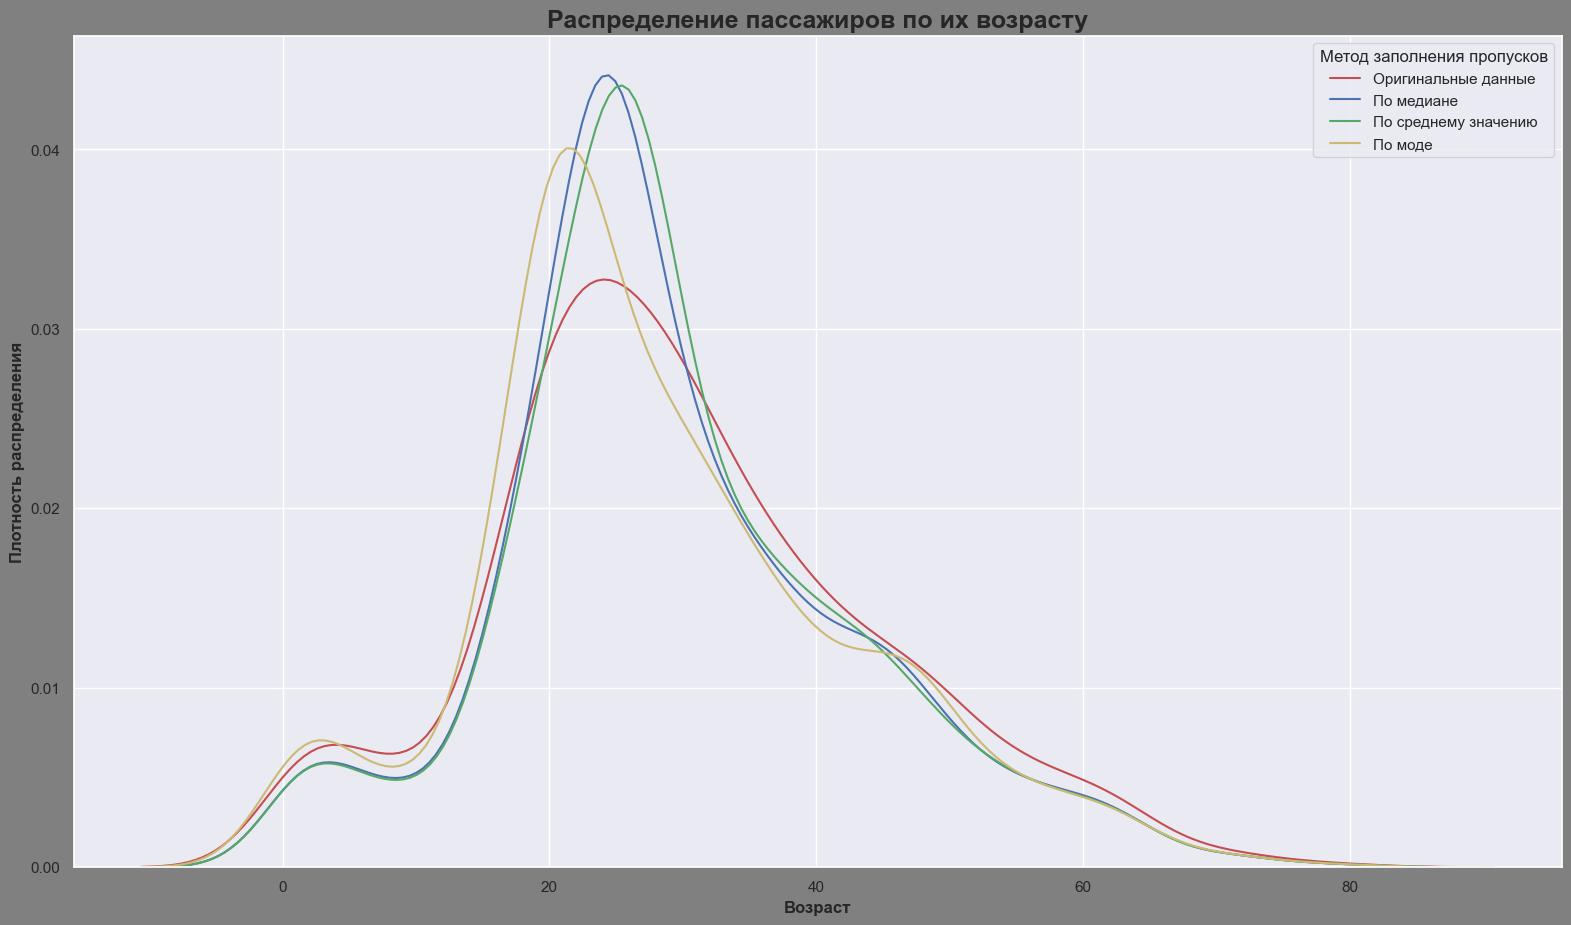

In [33]:
ttl = 'Распределение пассажиров по их возрасту'

plt.figure(figsize=[19.20, 10.8], facecolor = 'grey')
sns.kdeplot(data = tit2, x = 'Age', color = 'r')
sns.kdeplot(data = tit2, x = 'Age_median', color = 'b')
sns.kdeplot(data = tit2, x = 'Age_mean', color = 'g')
sns.kdeplot(data = tit2, x = 'Age_mode', color = 'y')
plt.title(ttl, fontsize = 18, fontweight = 'bold')
plt.xlabel('Возраст', fontweight = 'bold')
plt.ylabel('Плотность распределения', fontweight = 'bold')
plt.legend (title='Метод заполнения пропусков', 
            labels=['Оригинальные данные', 'По медиане', 
                    'По среднему значению', 'По моде'])
#plt.savefig(f'savefig/{time.strftime("%Y%m%d-%H%M%S")} - {ttl}.png')
plt.show()

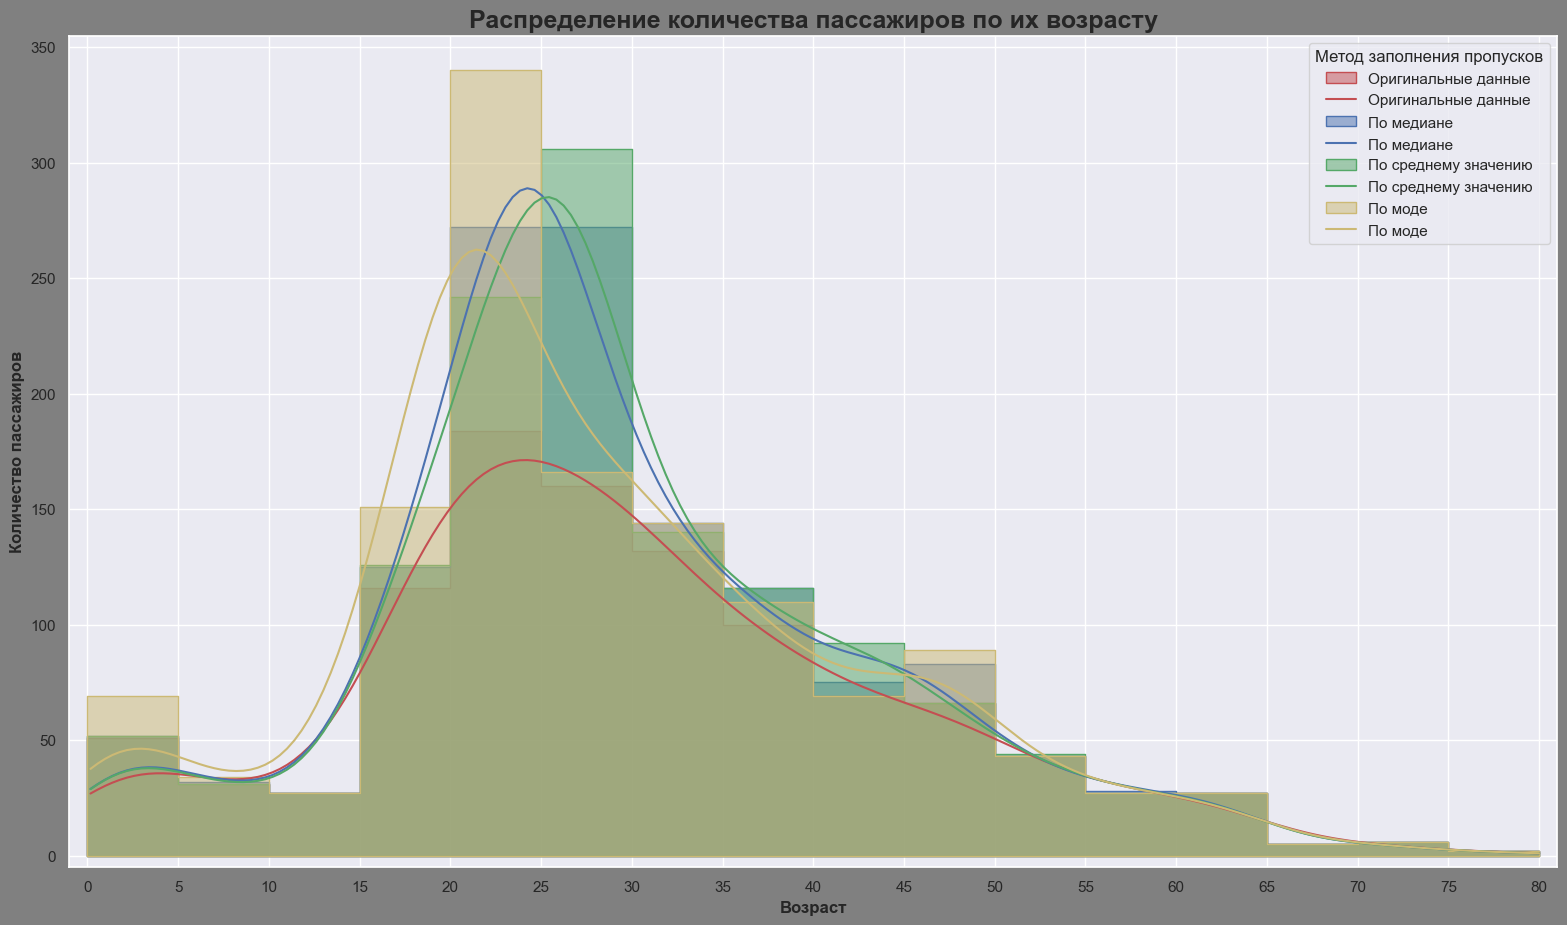

In [34]:
ttl = 'Распределение количества пассажиров по их возрасту'

plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')
sns.histplot(data = tit2, x = 'Age', kde=True, binwidth = 5, color = 'r', 
             element="step", binrange = [0, 80])
sns.histplot(data = tit2, x = 'Age_median', kde=True, binwidth = 5, color = 'b', 
             element="step", binrange = [0, 80])

sns.histplot(data = tit2, x = 'Age_mean', kde=True, binwidth = 5, color = 'g',
             element="step", binrange = [0, 80])

sns.histplot(data = tit2, x = 'Age_mode', kde=True, binwidth = 5, color = 'y',
             element="step", binrange = [0, 80])

plt.title(ttl, fontsize = 18, fontweight = 'bold')
plt.xlabel('Возраст', fontweight = 'bold')
plt.ylabel('Количество пассажиров', fontweight = 'bold')
plt.legend (title='Метод заполнения пропусков', 
            labels=['Оригинальные данные', 'Оригинальные данные', 'По медиане', 'По медиане', 
                    'По среднему значению', 'По среднему значению', 'По моде', 'По моде'])
plt.xlim(-1, 81)
plt.ylim(-5, 355)
plt.xticks(range(0, 82, 5))
plt.yticks(range(0, 352, 50))
#plt.savefig(f'savefig/{time.strftime("%Y%m%d-%H%M%S")} - {ttl}.png')
plt.show()

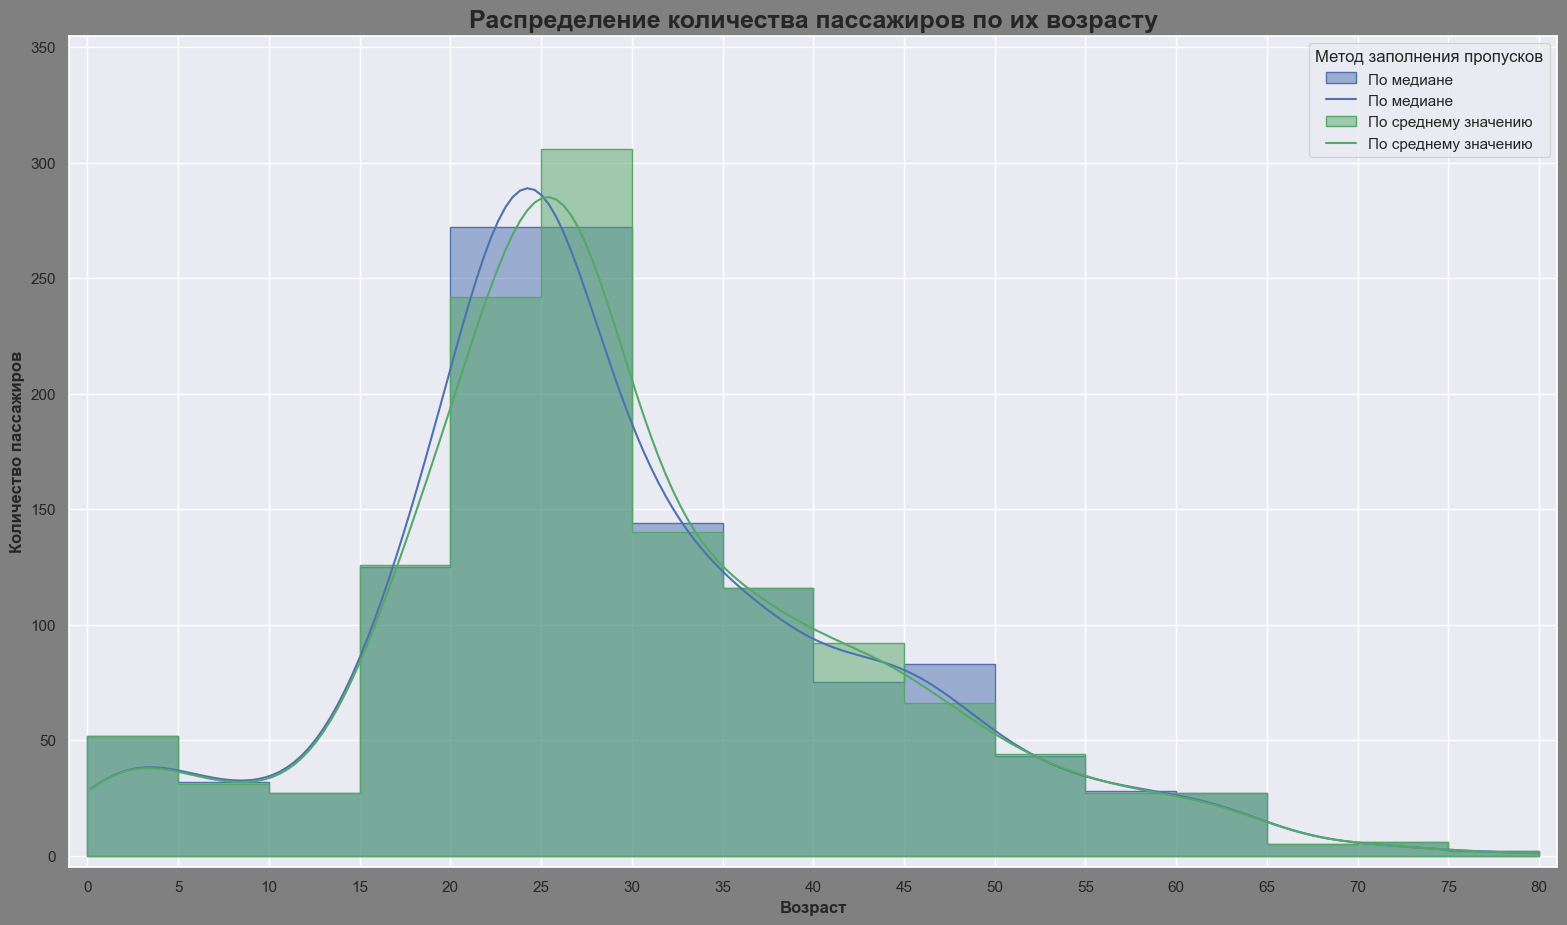

In [35]:
ttl = 'Распределение количества пассажиров по их возрасту'

plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')

sns.histplot(data = tit2, x = 'Age_median', kde=True, binwidth = 5, color = 'b', 
             element="step", binrange = [0, 80])

sns.histplot(data = tit2, x = 'Age_mean', kde=True, binwidth = 5, color = 'g',
             element="step", binrange = [0, 80])



plt.title(ttl, fontsize = 18, fontweight = 'bold')
plt.xlabel('Возраст', fontweight = 'bold')
plt.ylabel('Количество пассажиров', fontweight = 'bold')
plt.legend (title='Метод заполнения пропусков', 
            labels=['По медиане', 'По медиане', 
                    'По среднему значению', 'По среднему значению'])
plt.xlim(-1, 81)
plt.ylim(-5, 355)
plt.xticks(range(0, 82, 5))
plt.yticks(range(0, 352, 50))
#plt.savefig(f'savefig/{time.strftime("%Y%m%d-%H%M%S")} - {ttl}.png')
plt.show()

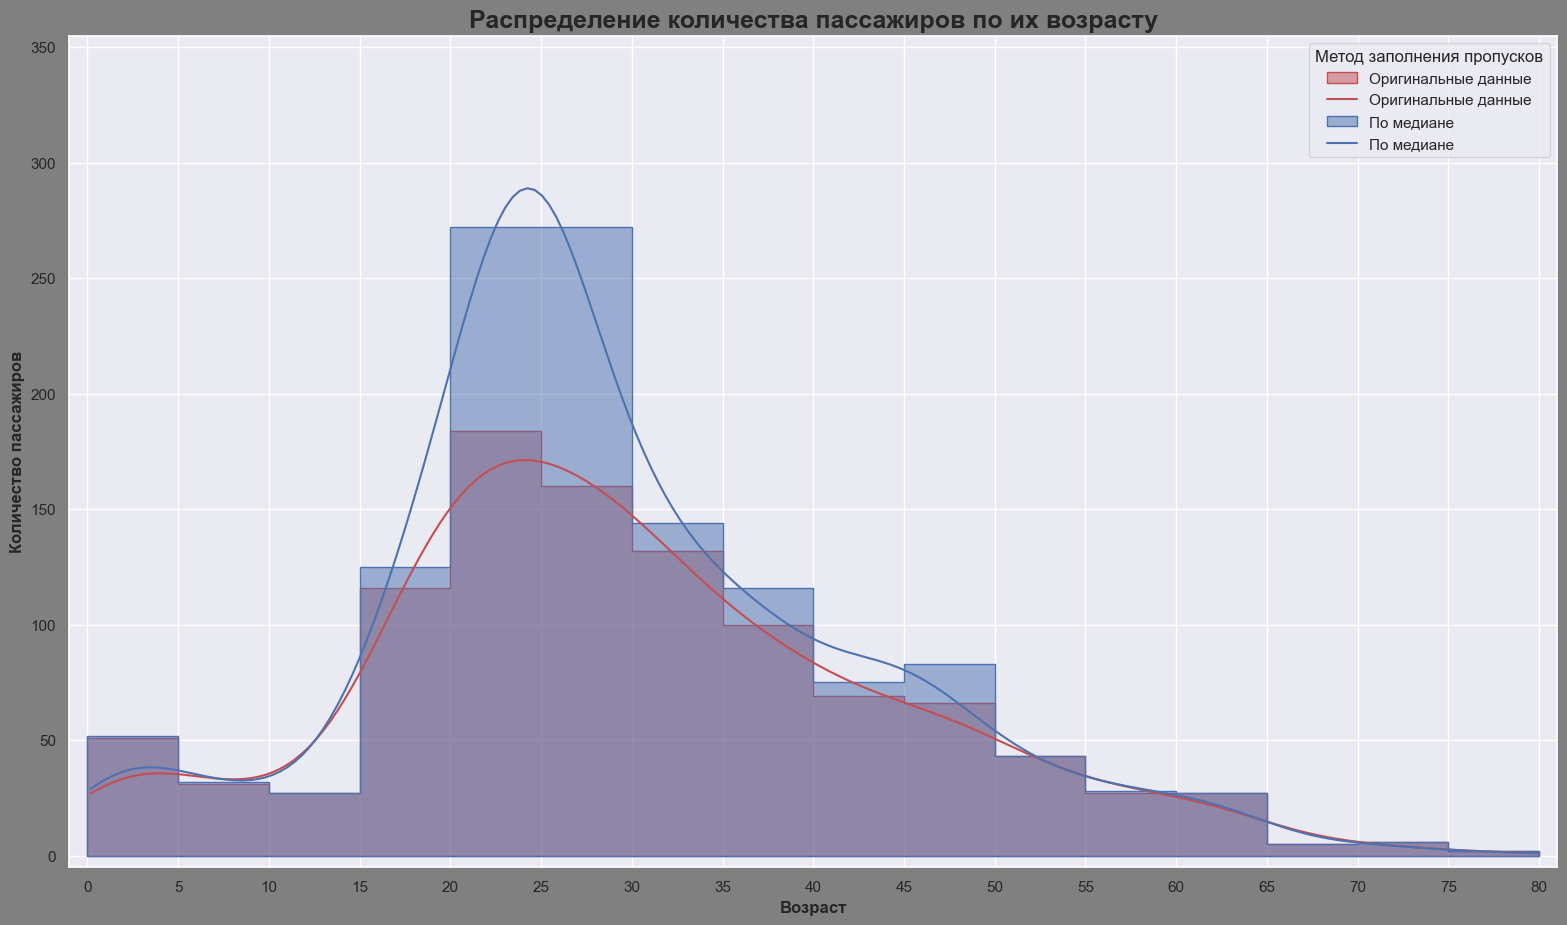

In [36]:
ttl = 'Распределение количества пассажиров по их возрасту'

plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')
sns.histplot(data = tit2, x = 'Age', kde=True, binwidth = 5, color = 'r', 
             element="step", binrange = [0, 80])
sns.histplot(data = tit2, x = 'Age_median', kde=True, binwidth = 5, color = 'b', 
             element="step", binrange = [0, 80])

plt.title(ttl, fontsize = 18, fontweight = 'bold')
plt.xlabel('Возраст', fontweight = 'bold')
plt.ylabel('Количество пассажиров', fontweight = 'bold')
plt.legend (title='Метод заполнения пропусков', 
            labels=['Оригинальные данные', 'Оригинальные данные', 'По медиане', 'По медиане'])
plt.xlim(-1, 81)
plt.ylim(-5, 355)
plt.xticks(range(0, 82, 5))
plt.yticks(range(0, 352, 50))
#plt.savefig(f'savefig/{time.strftime("%Y%m%d-%H%M%S")} - {ttl}.png')
plt.show()

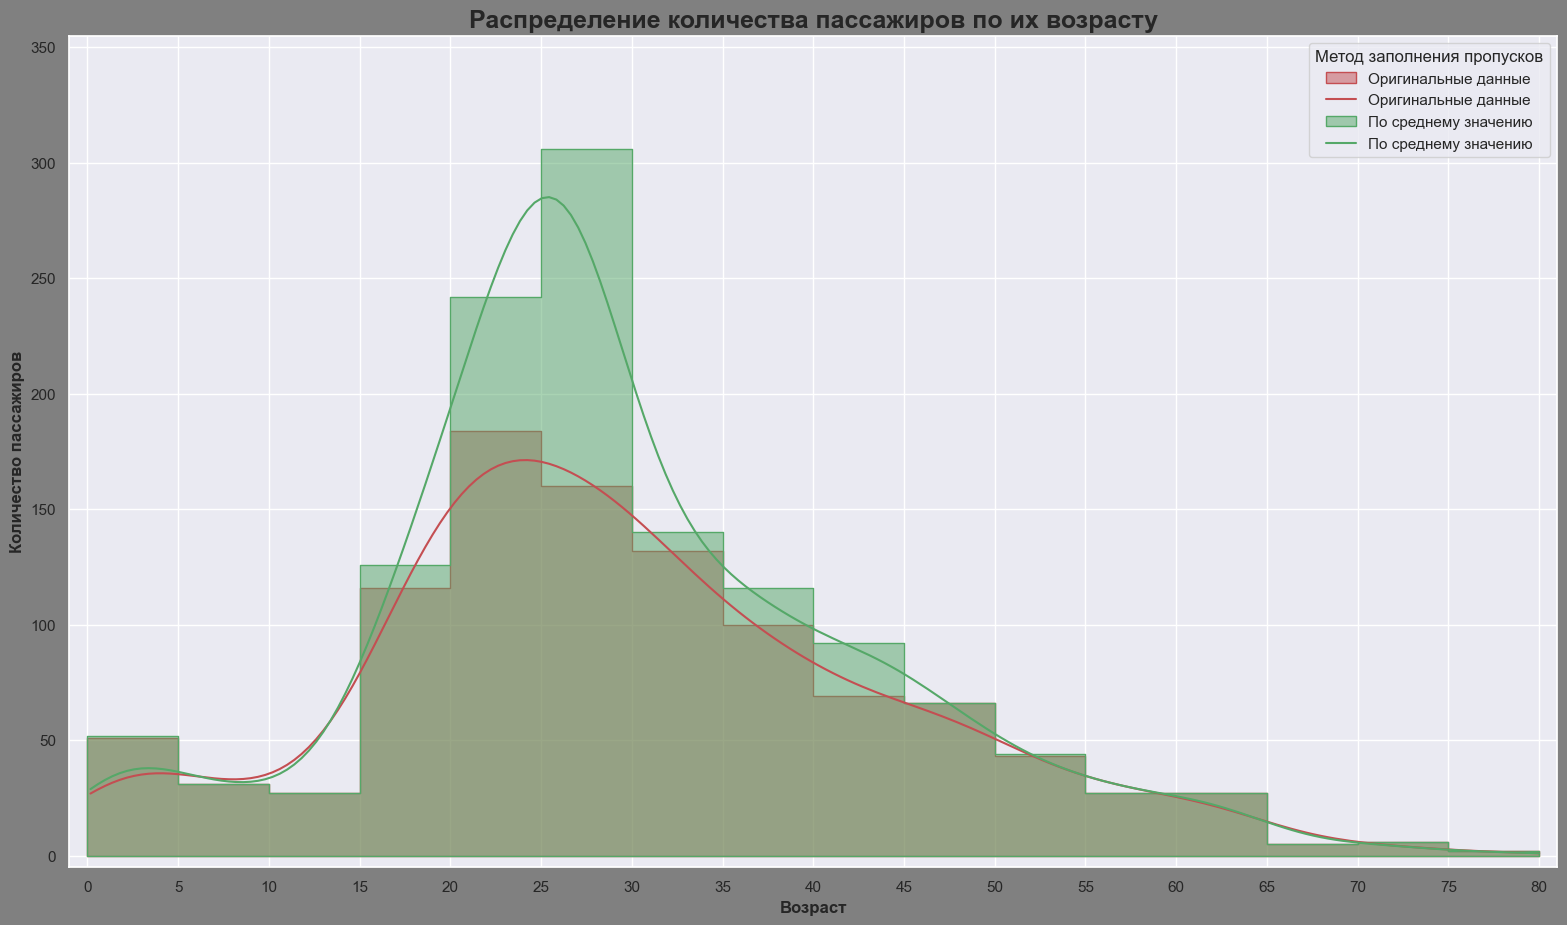

In [37]:
ttl = 'Распределение количества пассажиров по их возрасту'

plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')
sns.histplot(data = tit2, x = 'Age', kde=True, binwidth = 5, color = 'r', 
             element="step", binrange = [0, 80])

sns.histplot(data = tit2, x = 'Age_mean', kde=True, binwidth = 5, color = 'g',
             element="step", binrange = [0, 80])

plt.title(ttl, fontsize = 18, fontweight = 'bold')
plt.xlabel('Возраст', fontweight = 'bold')
plt.ylabel('Количество пассажиров', fontweight = 'bold')
plt.legend (title='Метод заполнения пропусков', 
            labels=['Оригинальные данные', 'Оригинальные данные', 
                    'По среднему значению', 'По среднему значению'])
plt.xlim(-1, 81)
plt.ylim(-5, 355)
plt.xticks(range(0, 82, 5))
plt.yticks(range(0, 352, 50))
#plt.savefig(f'savefig/{time.strftime("%Y%m%d-%H%M%S")} - {ttl}.png')
plt.show()

---

Рассмотрев полученные данные оставим следующие:

* Пропуски по стоимости билета оставим заполненными по моде.

* Пропуски по возрасту пока лучше будет оставить заполненными по медиане, т.к. рассмотрев графики выше мы видим, что распределение оригинальных данных и заполных по медиане более схожи между собой.

Для анализа данных сделаем новый DataFrame tit3

---

In [38]:
tit2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked', 'Age_median', 'Age_mean', 'Age_mode', 'Fare_mode'],
      dtype='object')

In [39]:
list(tit2)

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Embarked',
 'Age_median',
 'Age_mean',
 'Age_mode',
 'Fare_mode']

In [40]:
print(list(tit2))

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Age_median', 'Age_mean', 'Age_mode', 'Fare_mode']


In [41]:
tit3 = tit2[   ['Survived', 'Sex', 'Age_median','Pclass', 'Fare_mode', 'SibSp', 'Parch', 'Embarked']]
tit3.columns = ['Survived', 'Sex', 'Age',       'Pclass', 'Fare',      'SibSp', 'Parch', 'Embarked']
tit3

,Survived,Sex,Age,Pclass,Fare,SibSp,Parch,Embarked
0,0,male,22.0,3,7.2500,1,0,S
1,1,female,38.0,1,71.2833,1,0,C
2,1,female,26.0,3,7.9250,0,0,S
3,1,female,35.0,1,53.1000,1,0,S
4,0,male,35.0,3,8.0500,0,0,S
...,...,...,...,...,...,...,...,...
1304,0,male,25.0,3,8.0500,0,0,S
1305,1,female,39.0,1,108.9000,0,0,C
1306,0,male,38.5,3,7.2500,0,0,S
1307,0,male,25.0,3,8.0500,0,0,S


In [42]:
info(tit3, False)

----------------------------------------------------------------------------------------
Количество данных      - 1309
----------------------------------------------------------------------------------------
Количество дубликатов  - 217
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
0,Survived,2,1307,0,0.0,int64
1,Sex,2,1307,0,0.0,object
2,Age,101,1208,0,0.0,float64
3,Pclass,3,1306,0,0.0,int64
4,Fare,281,1028,0,0.0,float64
5,SibSp,7,1302,0,0.0,int64
6,Parch,8,1301,0,0.0,int64
7,Embarked,3,1306,0,0.0,object


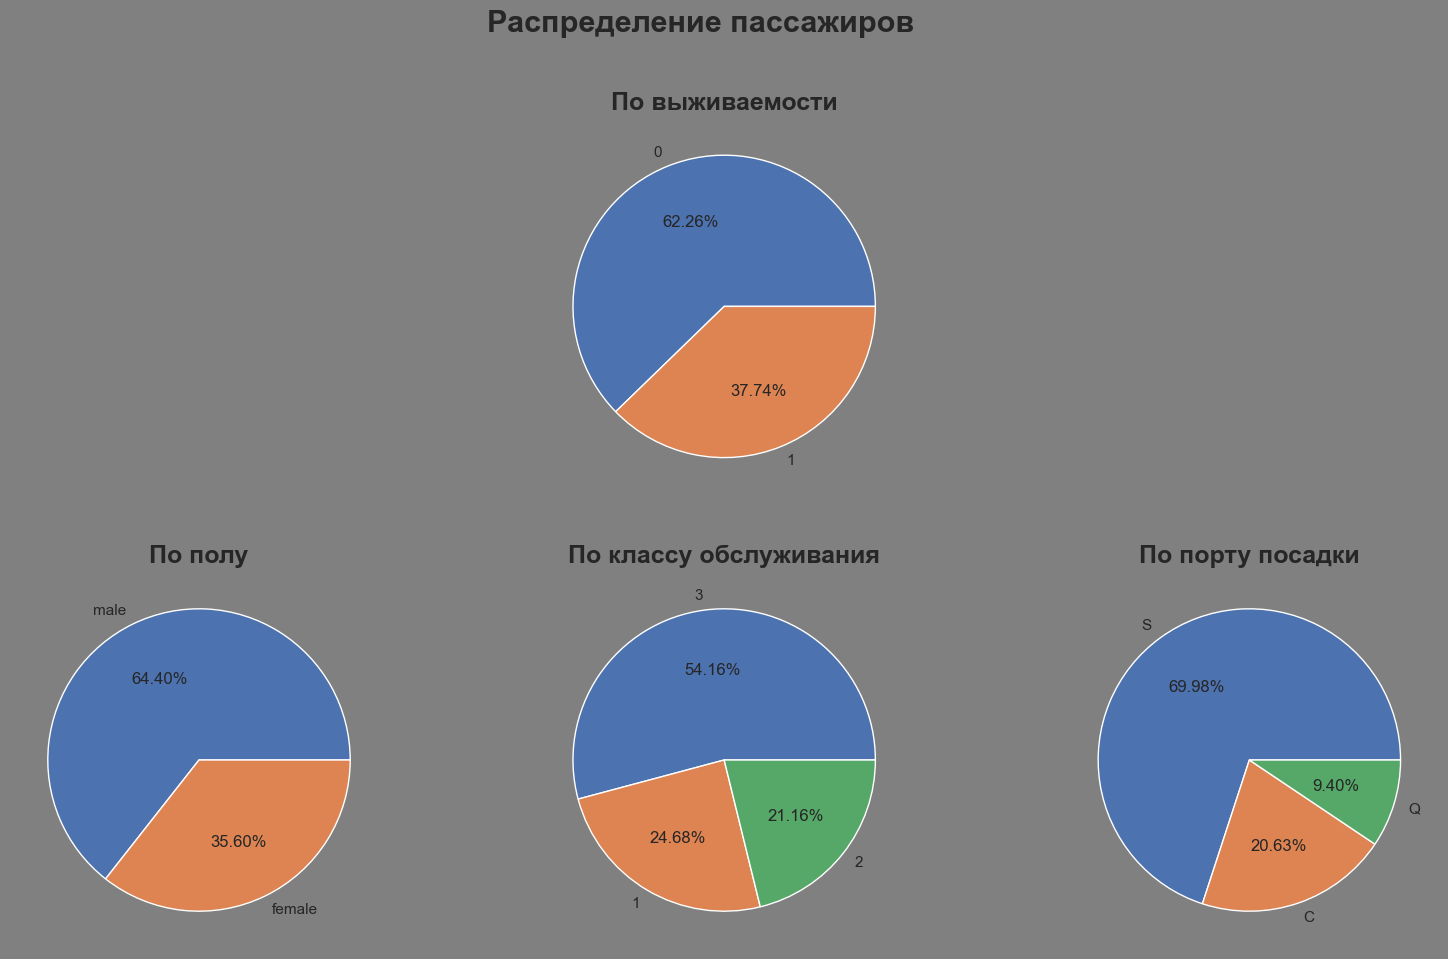

In [43]:
ttl = 'Распределение пассажиров'

plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')

plt.suptitle(ttl, fontsize = 22, fontweight = 'bold')

plt.subplot(2, 3, 2)
plt.pie(tit3['Survived'].value_counts().values.tolist(),
        labels = tit3['Survived'].value_counts().index.tolist(), 
        autopct='%.2f%%') #, colors=['olivedrab', 'rosybrown'], shadow=True)
plt.title('По выживаемости', fontsize = 18, fontweight = 'bold')

plt.subplot(2, 3, 4)
plt.pie(tit3['Sex'].value_counts().values.tolist(),
        labels = tit3['Sex'].value_counts().index.tolist(), 
        autopct='%.2f%%')  
plt.title('По полу', fontsize = 18, fontweight = 'bold')

plt.subplot(2, 3, 5)
plt.pie(tit3['Pclass'].value_counts().values.tolist(),
        labels = tit3['Pclass'].value_counts().index.tolist(), 
        autopct='%.2f%%')
plt.title('По классу обслуживания', fontsize = 18, fontweight = 'bold')

plt.subplot(2, 3, 6)
plt.pie(tit3['Embarked'].value_counts().values.tolist(),
        labels = tit3['Embarked'].value_counts().index.tolist(), 
        autopct = '%1.2f%%')
plt.title('По порту посадки', fontsize = 18, fontweight = 'bold')

#plt.savefig(f'savefig/{time.strftime("%Y%m%d-%H%M%S")} - {ttl}.png')
plt.show()

In [44]:
def gr_raspr (df, x, h = None, tt = None):

    plt.figure(figsize=[19.2, 10.8], facecolor = 'grey') #, sharex=True)
    plt.suptitle(tt, fontsize = 22, fontweight = 'bold')
    
    plt.subplot(2, 1, 1)
    sns.boxplot(data = df, x = x, y = h, orient = 'h')

    plt.subplot(2, 1, 2)
    sns.histplot(data = df, x = x, hue = h, kde = True, binwidth = 5)
                 
    plt.show()

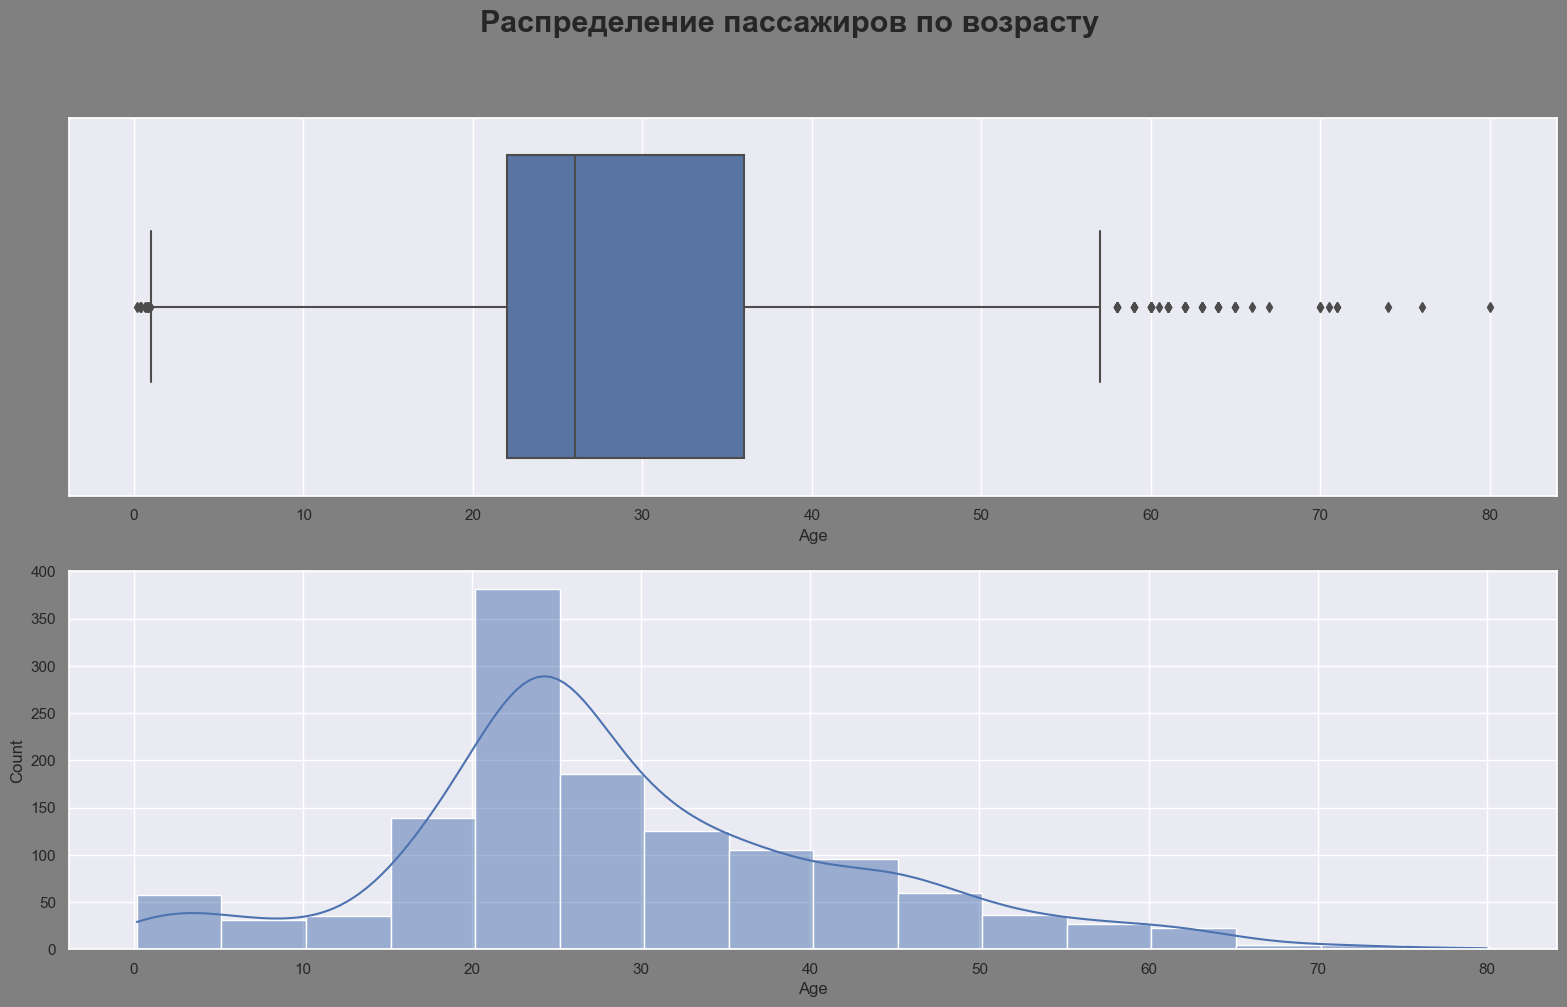

In [45]:
gr_raspr(df = tit3, x = 'Age', tt = 'Распределение пассажиров по возрасту')

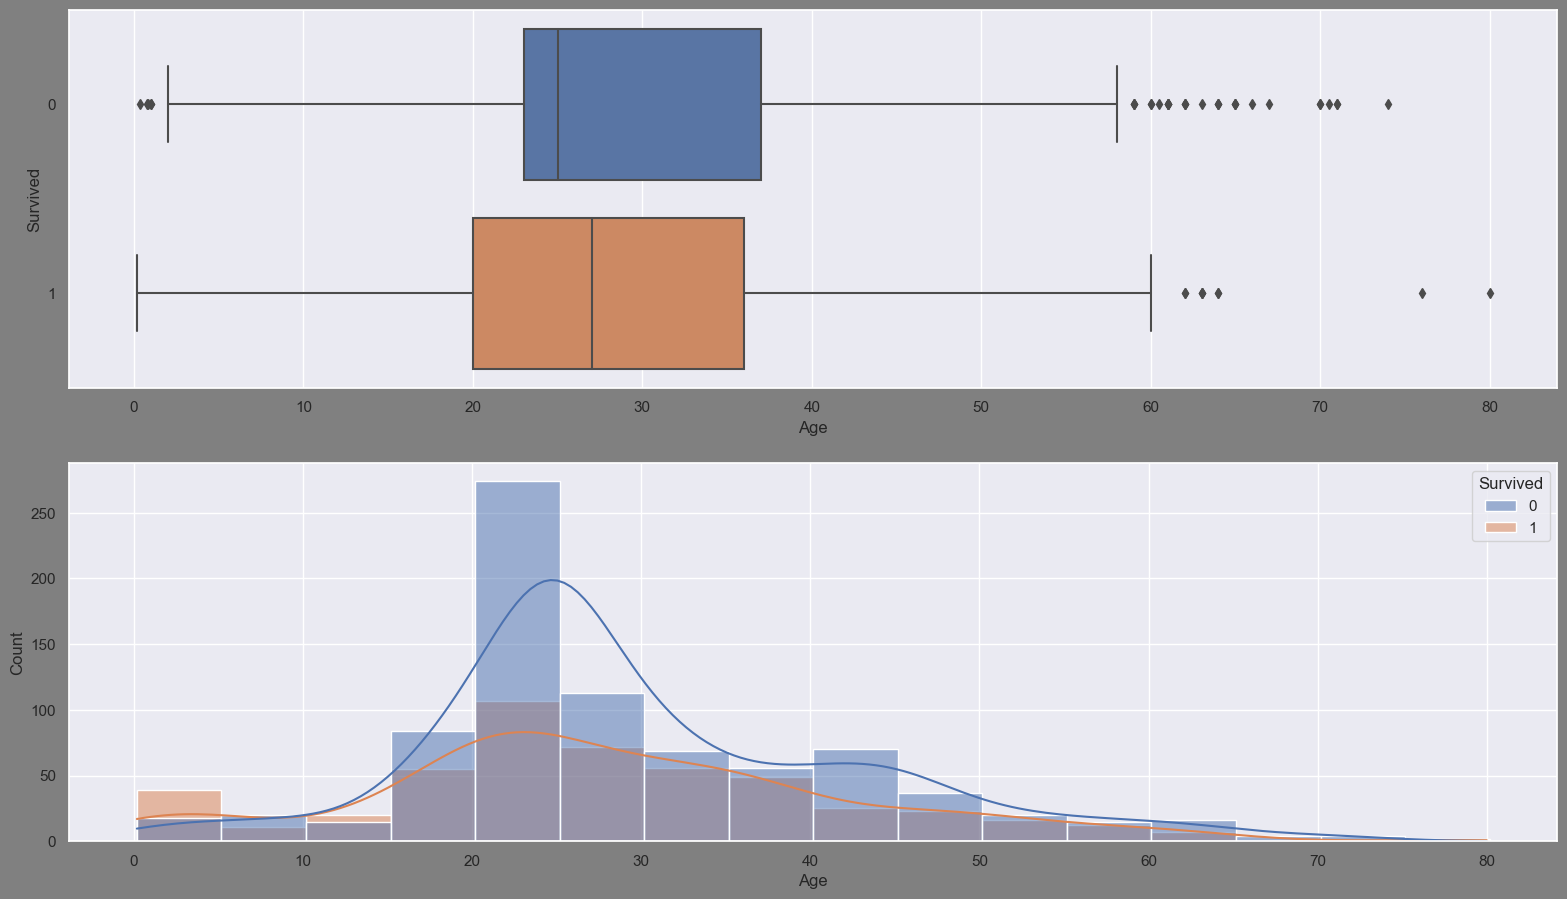

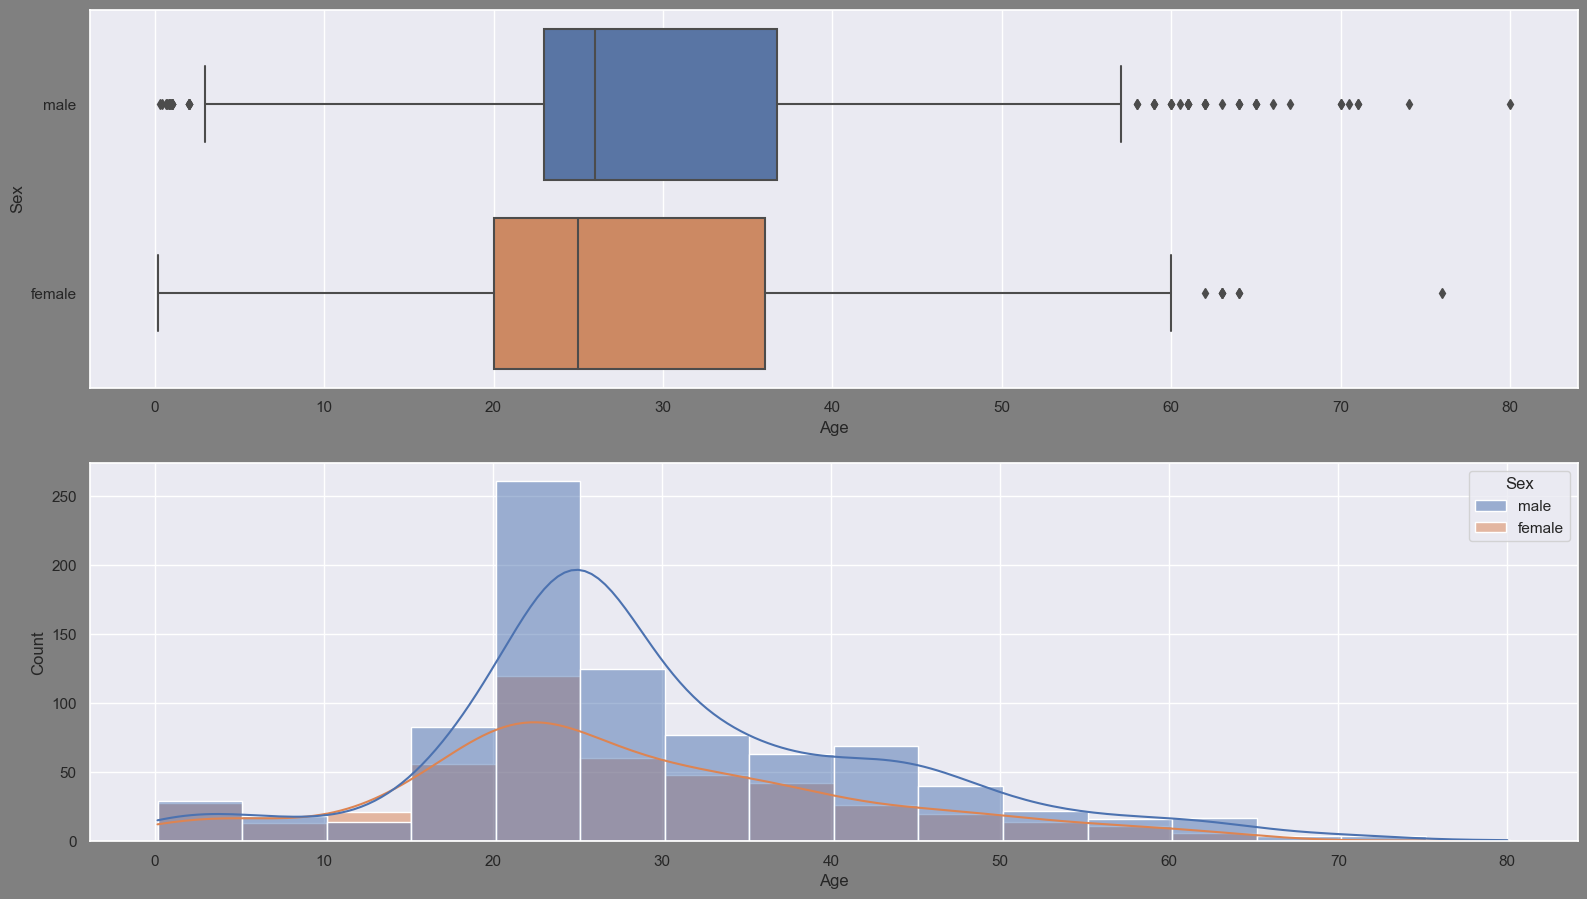

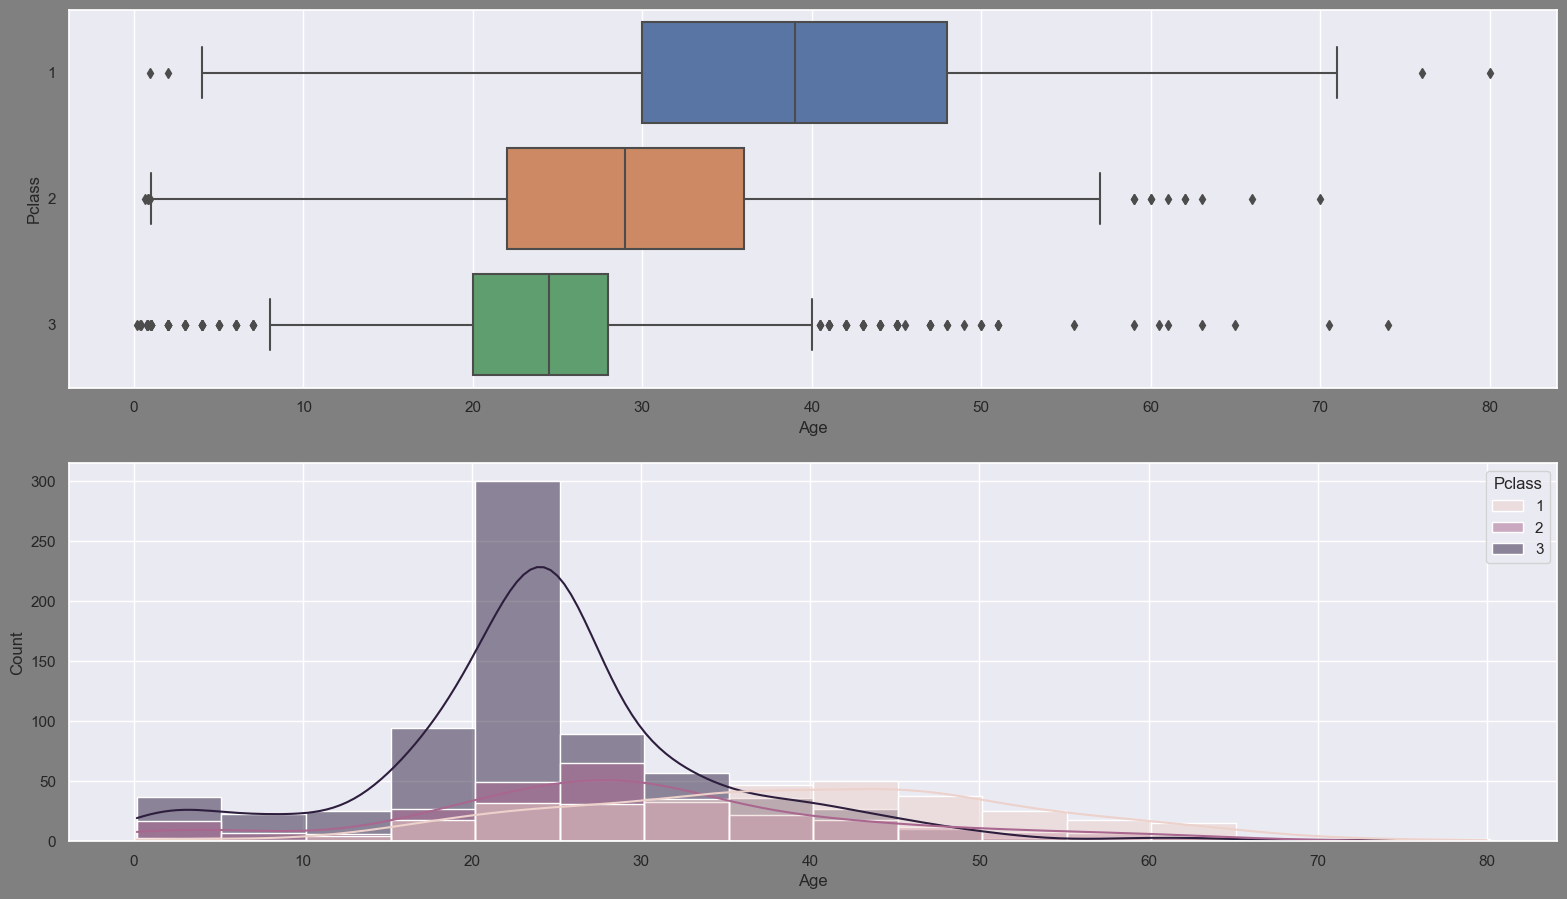

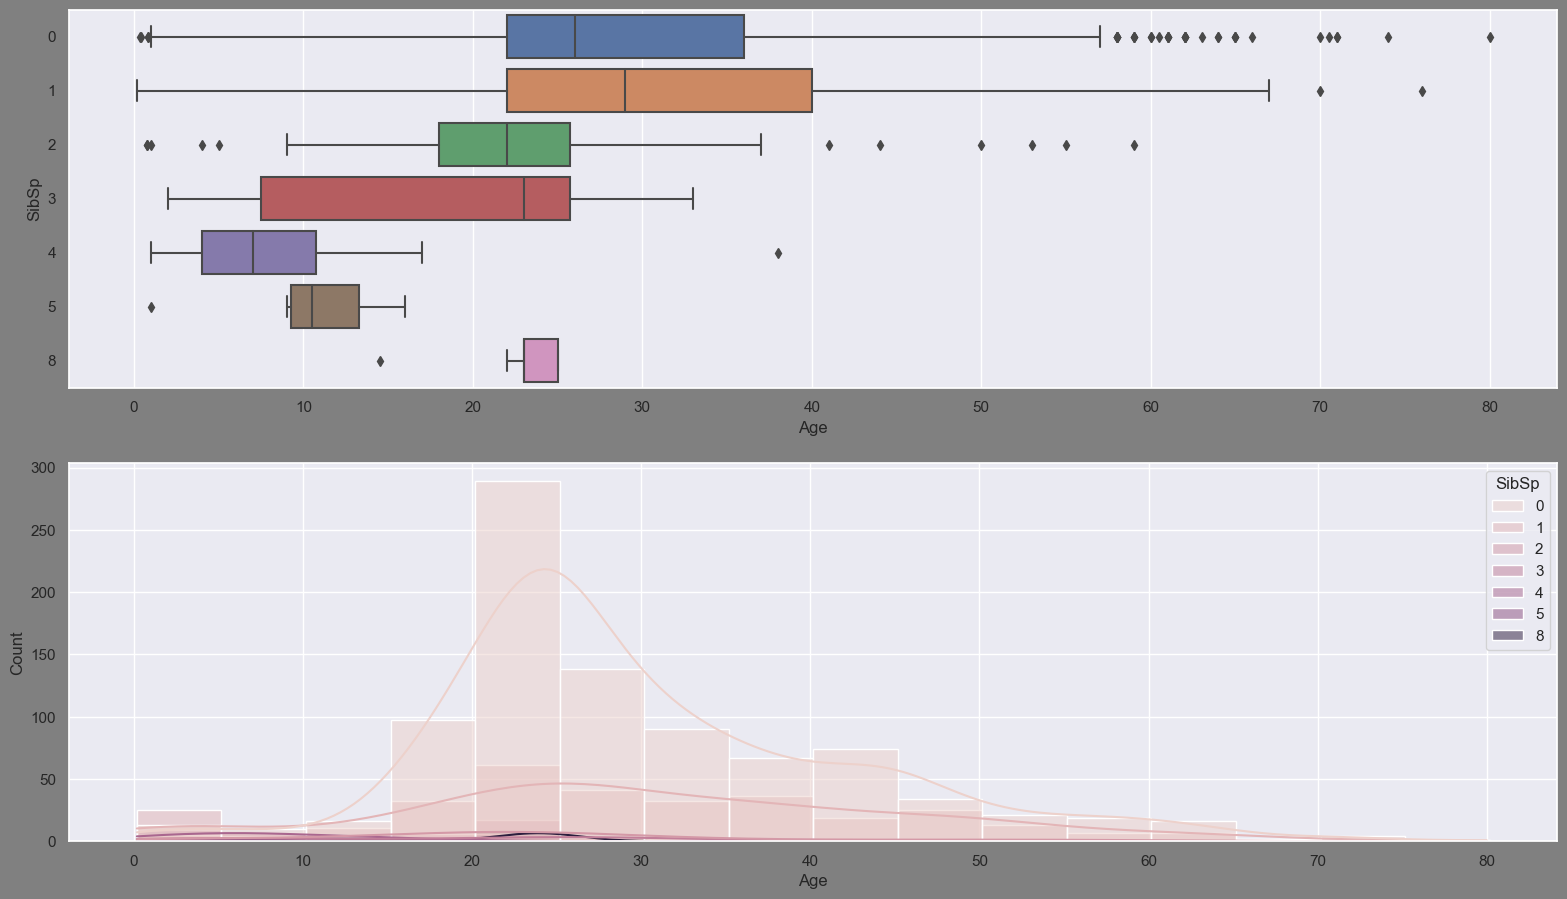

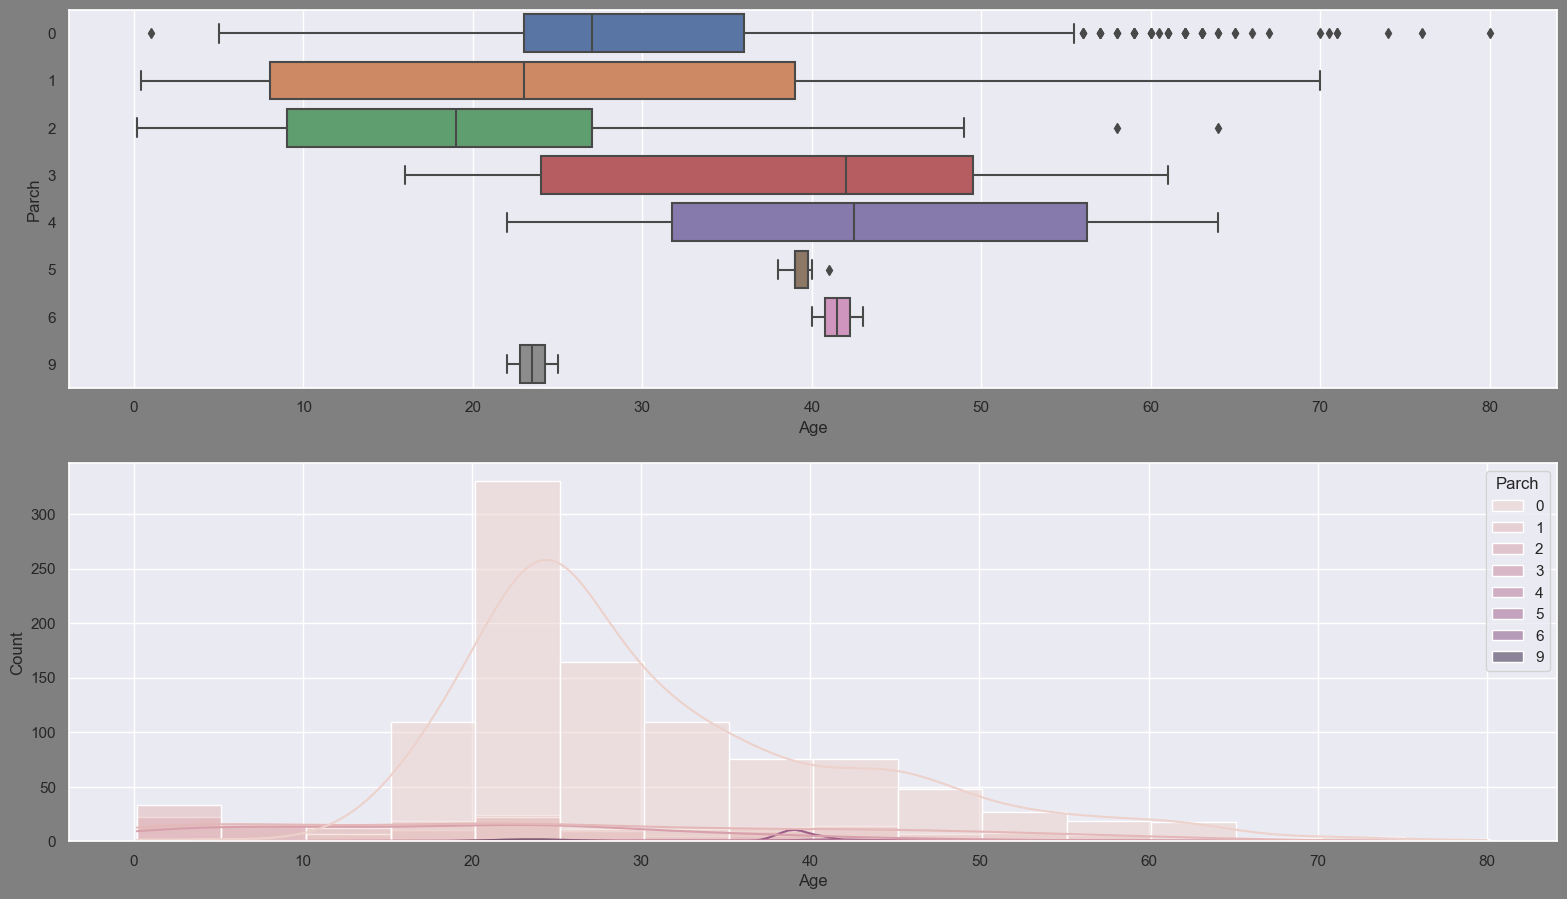

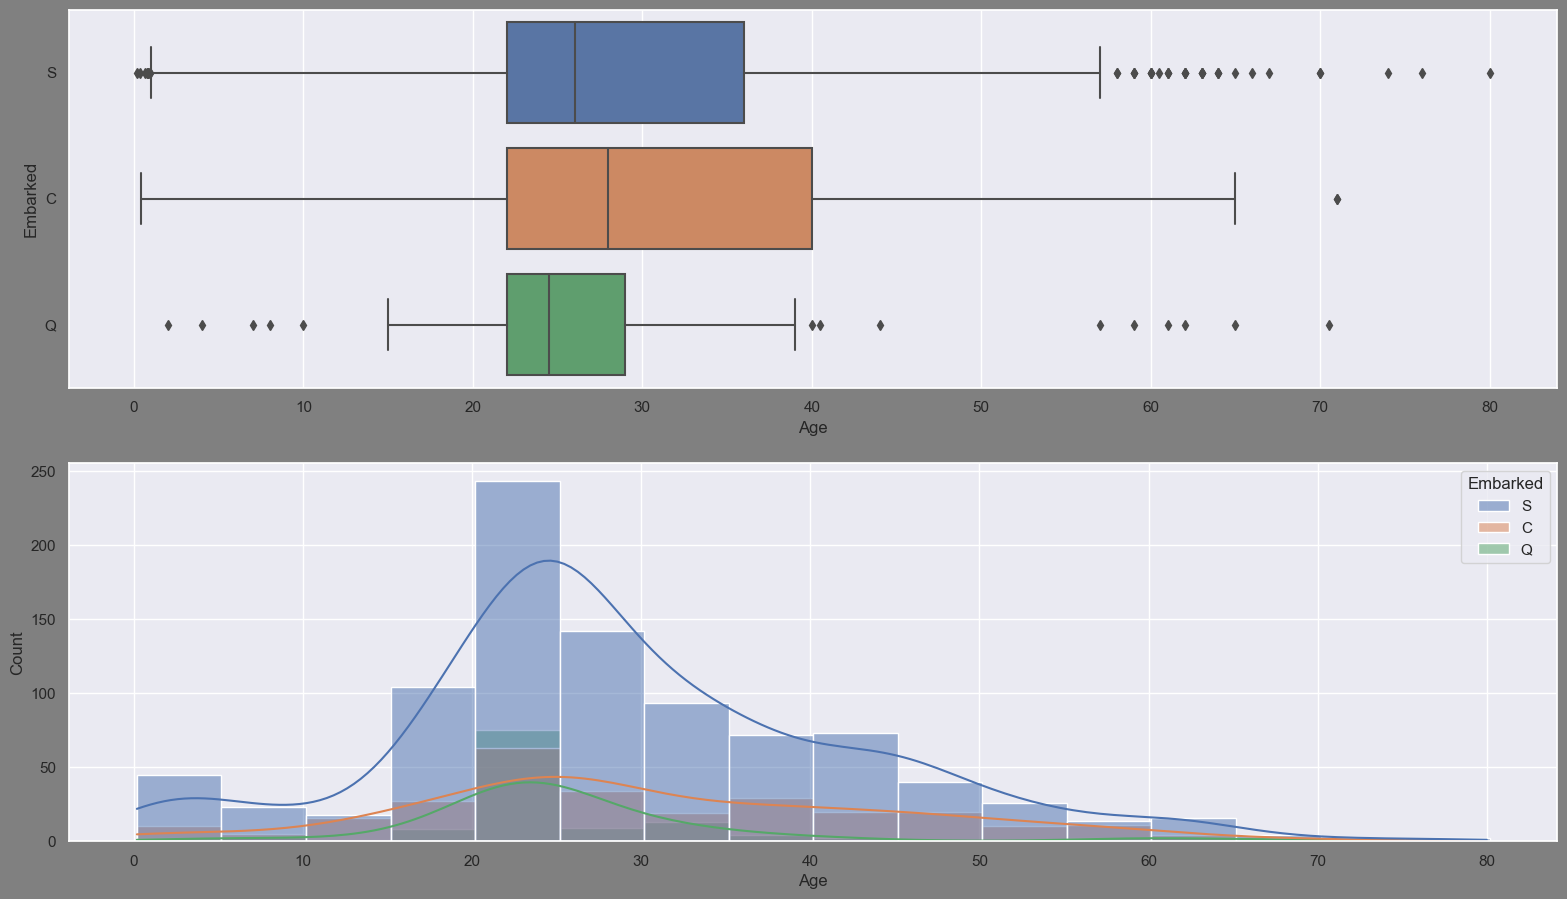

In [46]:
for a in ['Survived','Sex', 'Pclass',  'SibSp', 'Parch', 'Embarked']:
    gr_raspr(df = tit3, x = 'Age', h = a)

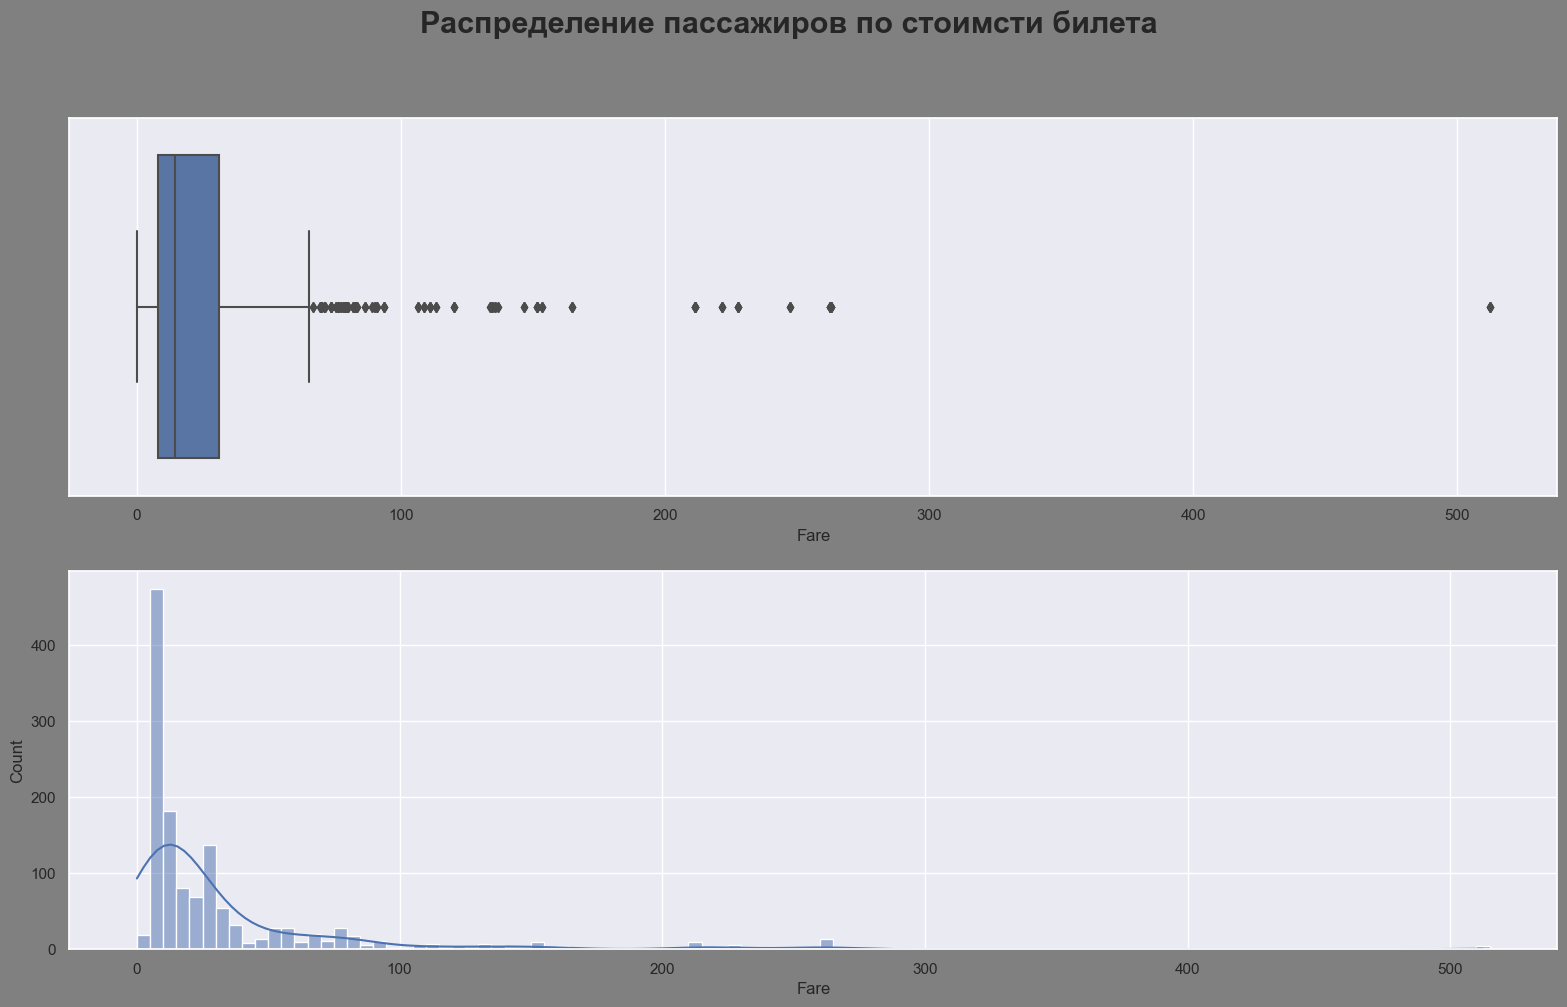

In [47]:
gr_raspr(df = tit3, x = 'Fare', tt = 'Распределение пассажиров по стоимсти билета')

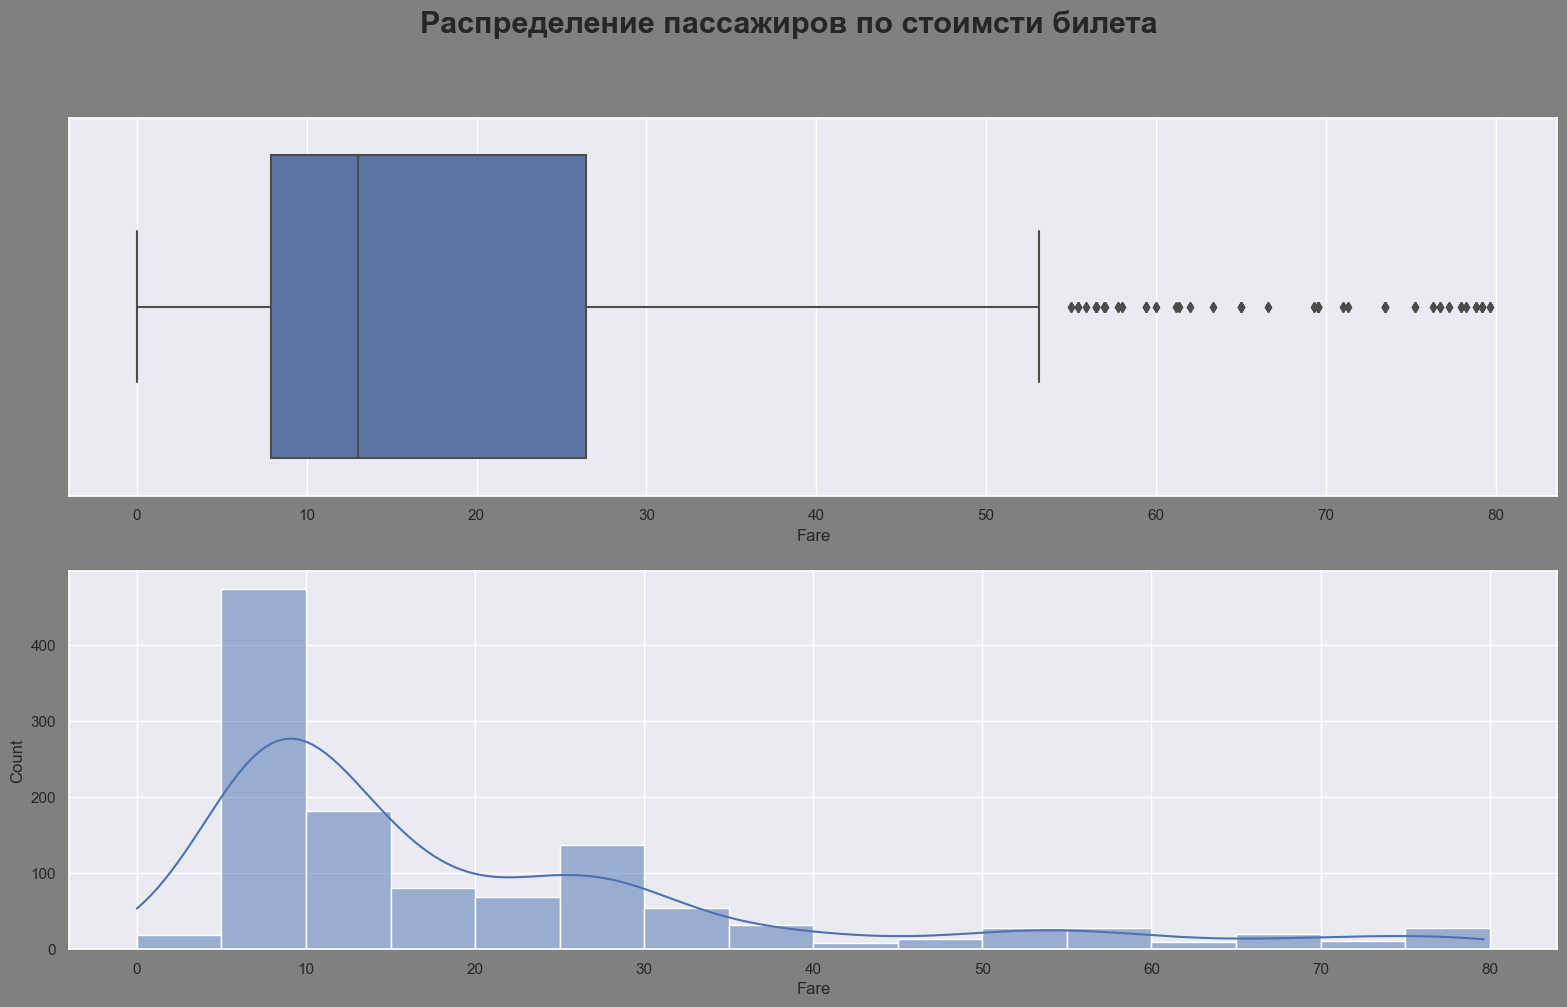

In [48]:
gr_raspr(df = tit3[tit3['Fare'] < 80], x = 'Fare', tt = 'Распределение пассажиров по стоимсти билета')

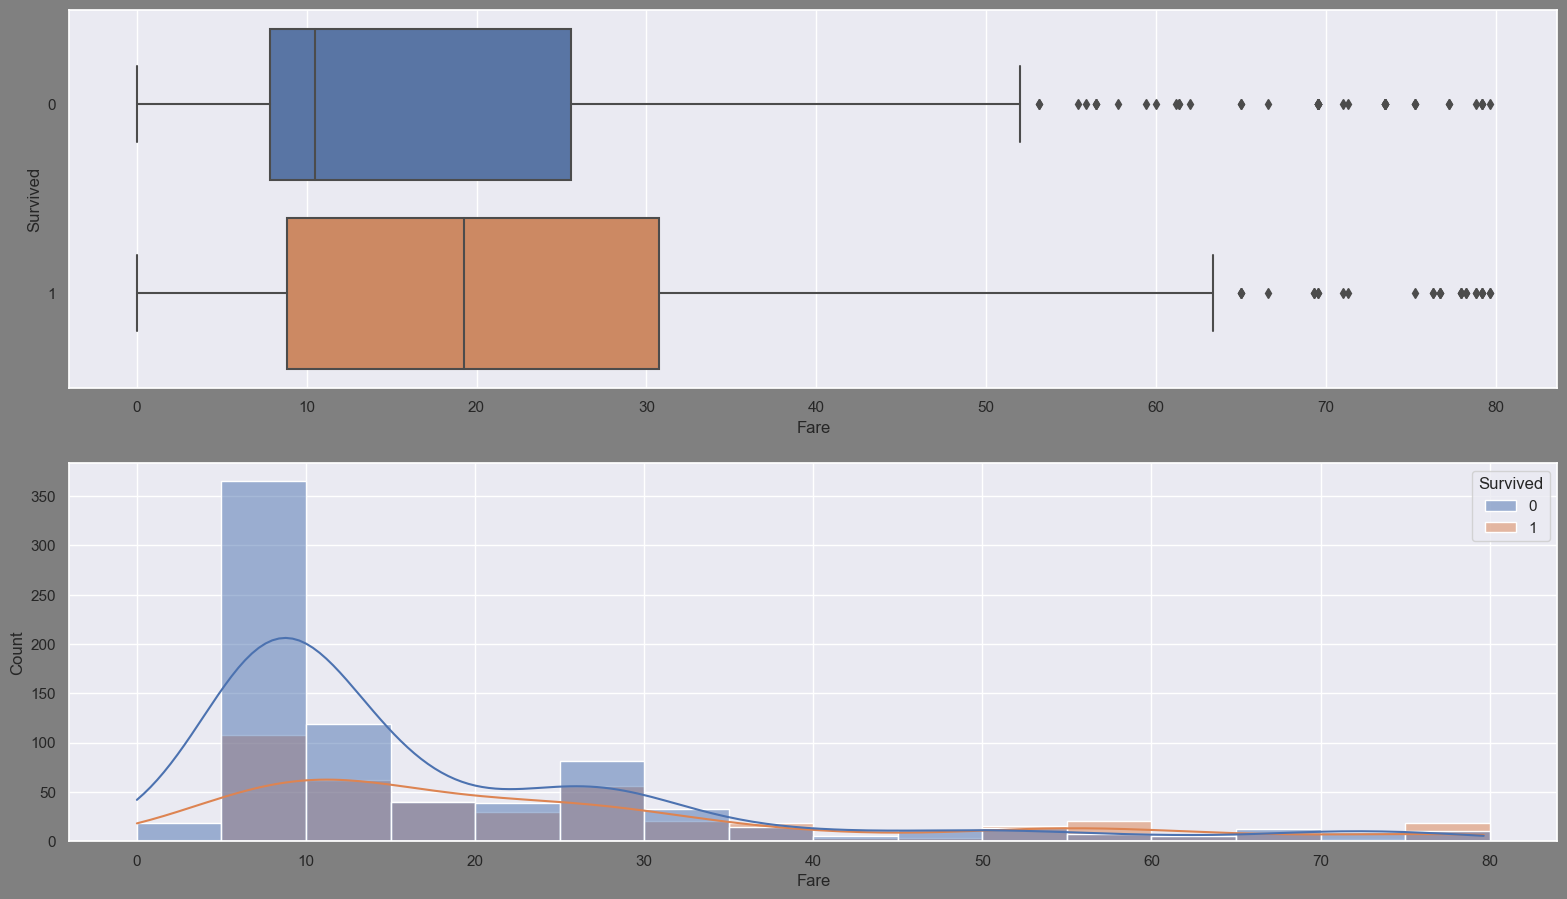

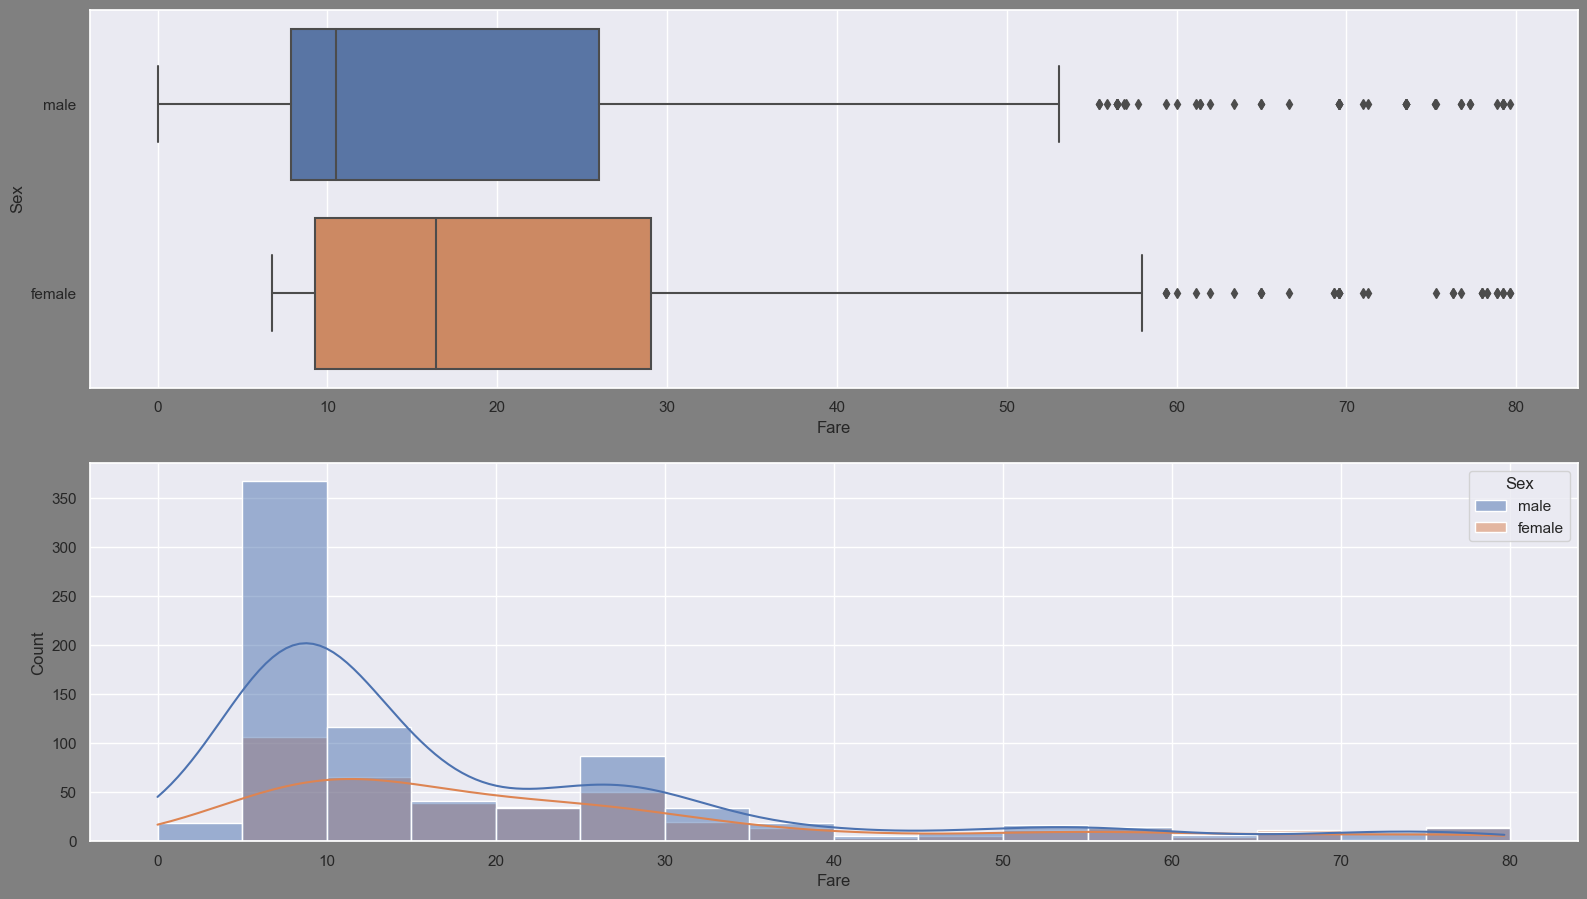

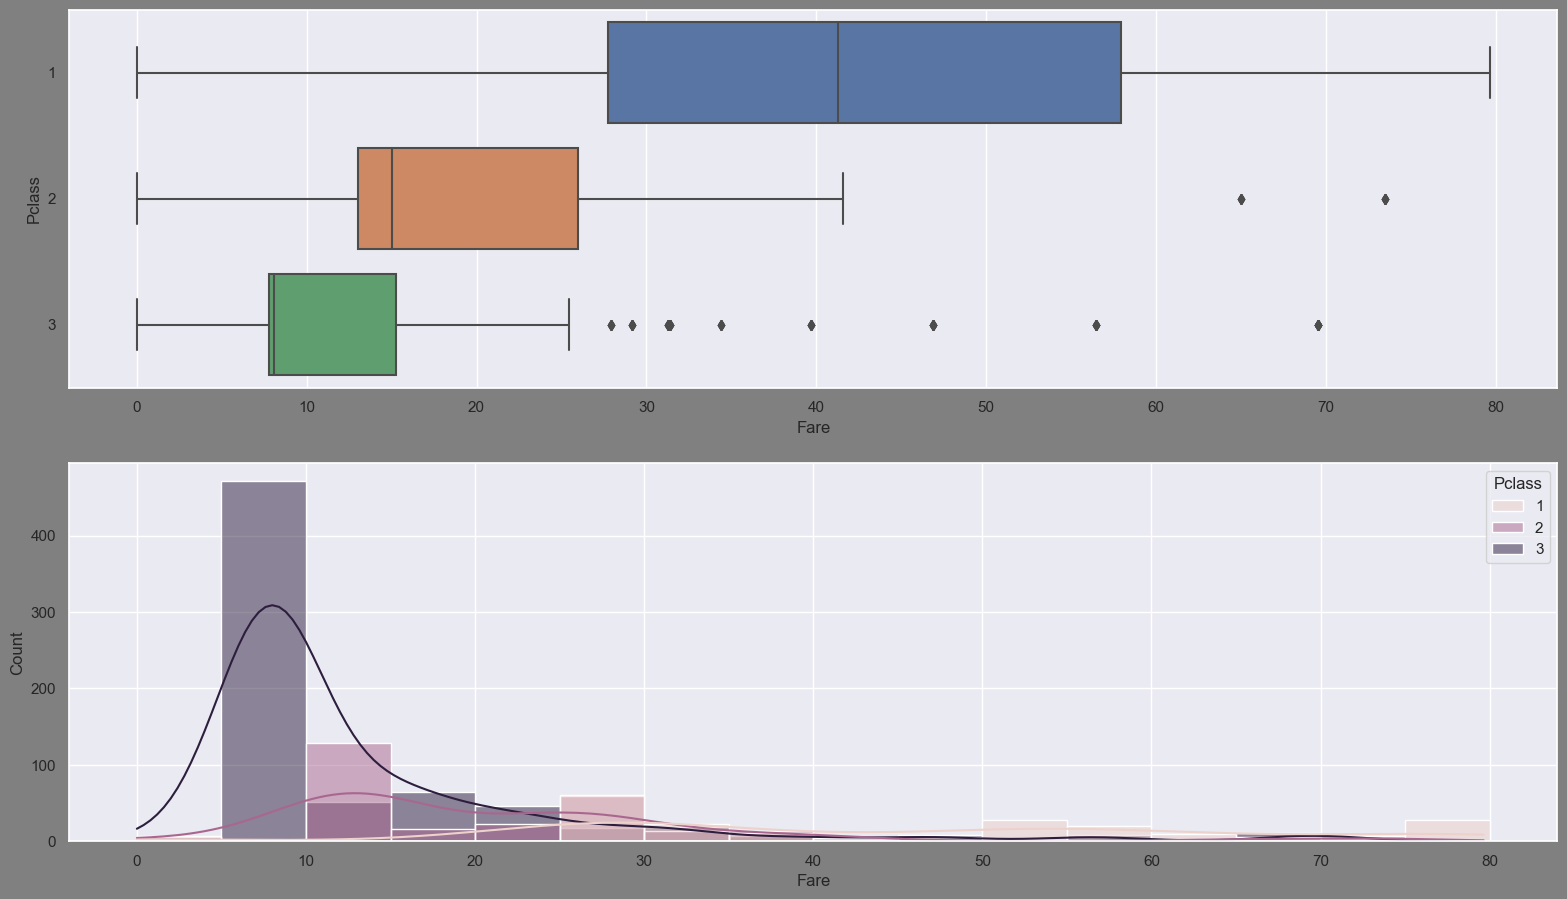

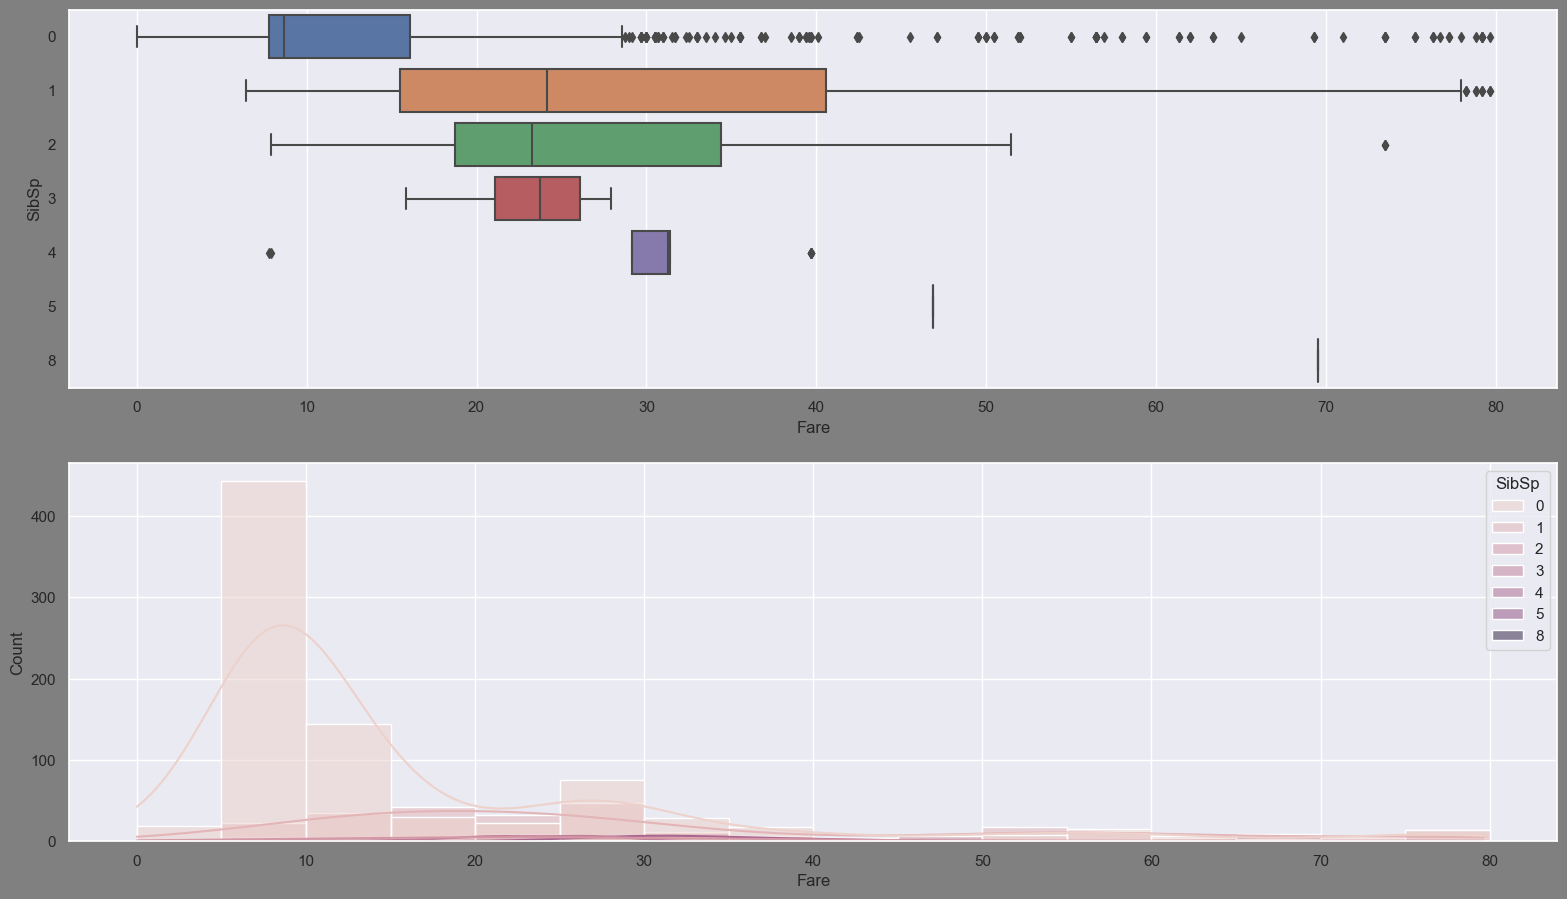

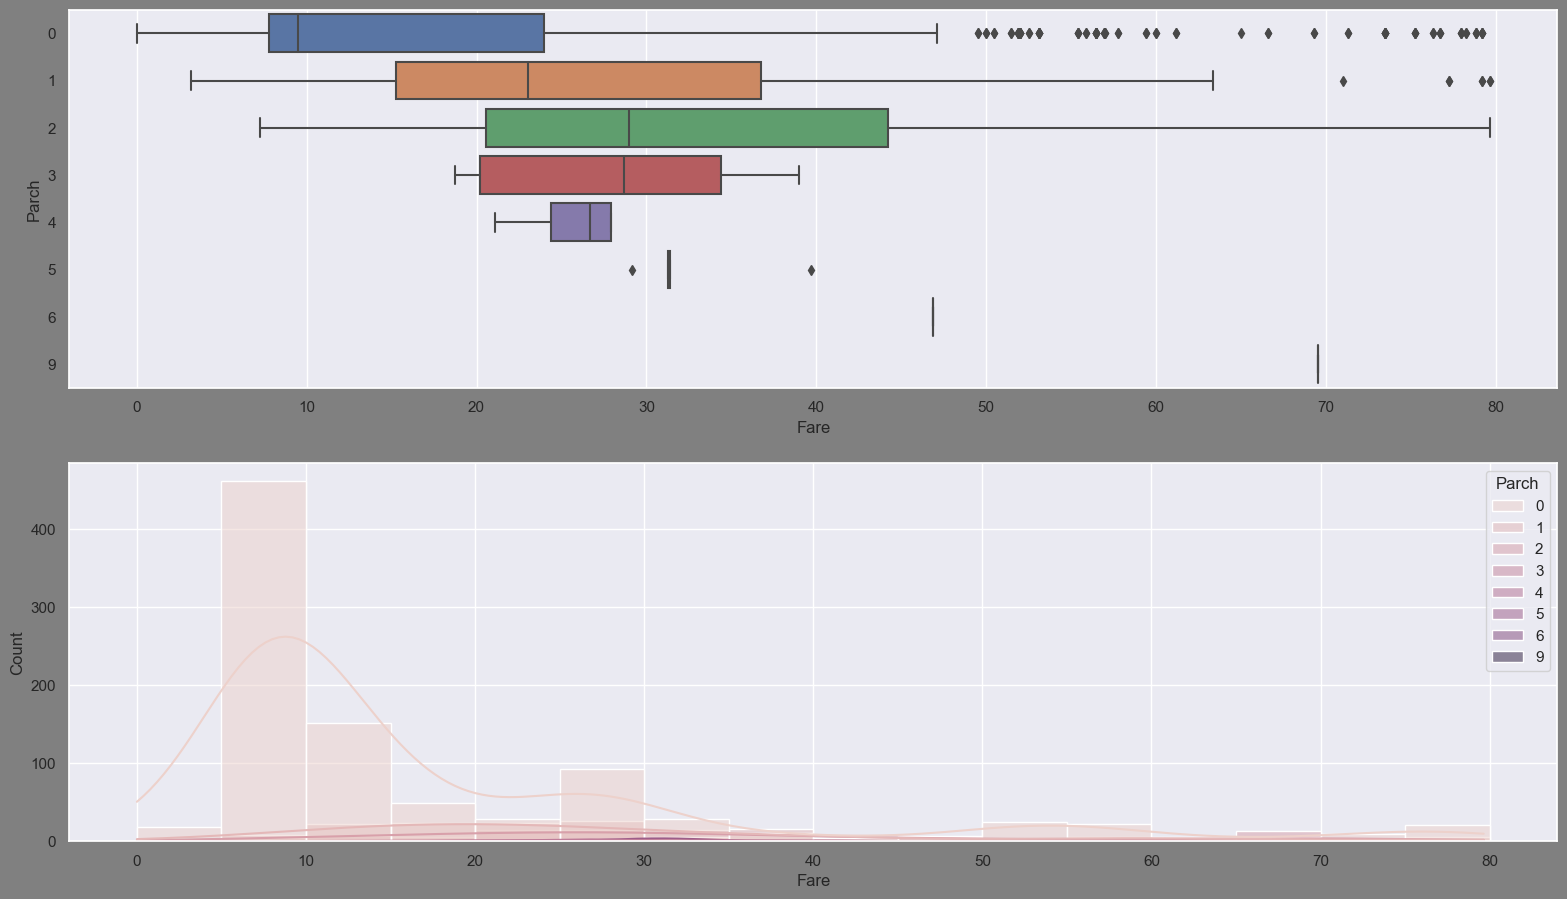

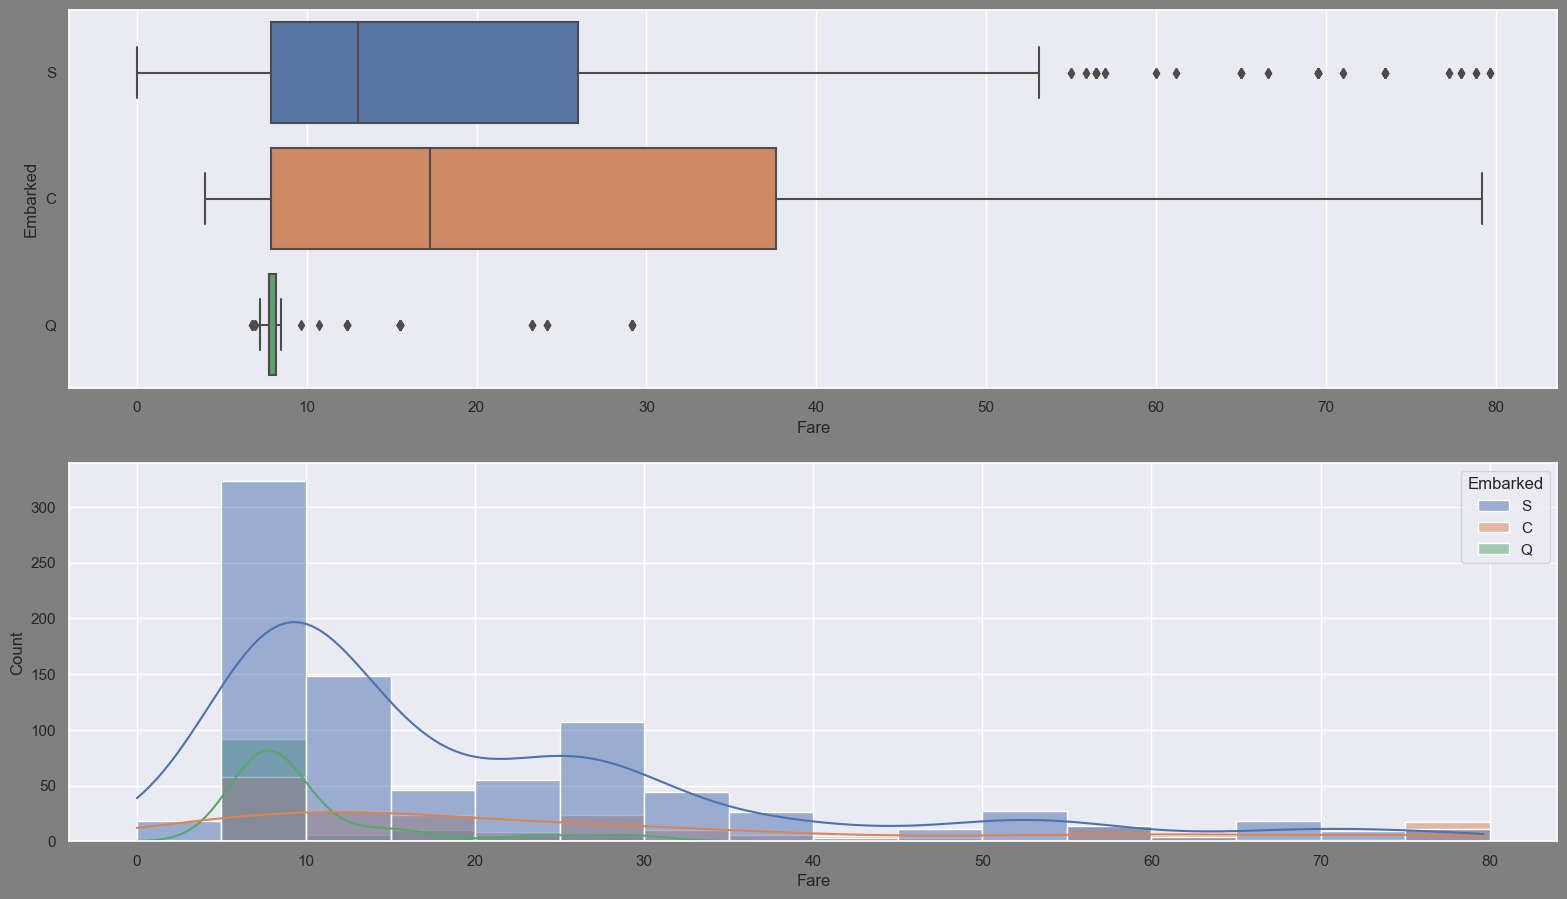

In [49]:
for a in ['Survived','Sex', 'Pclass',  'SibSp', 'Parch', 'Embarked']:
    gr_raspr(df = tit3[tit3['Fare'] < 80], x = 'Fare', h = a)

---

Рассмотрев графики распределения, можно сделать следующие выводы:

* Выживаемость составила 37.74 
  %
* Пассажиров мужского пола было почти в 2 раза больше (64.4%)
* Основное количество пассажиров путешествовало 3-им классом (54.16%), в первом и втором классах было примерно одинаковое количество пассажиров, 24.68% 21.16% соответственно.
* Основная масса пассажиров имела возраст от 20 до 40 лет, но если смотреть график распределения с учетом класса палубы, то мы видим, что более взрослые пассажиры предпочитают более высокий класс обслуживания.
* В порту посадке S село наибольшее кол-во человек (69.82%), в порту C (20.78%), а в порту Q (9.40%). Причем если смотрим графики распределения по возрасту и по стоимости билета, мы видим, что в порту С основное кол-во пассажиров имеет более высокий возраст и более высокую цену билета. Что дает право предположить, что основная масса пассажиров путешествует 1 классом. А из порта Q в основном все пассажиры в 3 классе.

Теперь расмотрим более подробно данные с различными группировками и попробуем увидеть новые зависимости в данных

---

In [50]:
tit3.describe().round(2)

,Survived,Age,Pclass,Fare,SibSp,Parch
count,1309.00,1309.00,1309.00,1309.00,1309.00,1309.00
mean,0.38,29.25,2.29,33.28,0.50,0.39
std,0.48,13.35,0.84,51.74,1.04,0.87
min,0.00,0.17,1.00,0.00,0.00,0.00
25%,0.00,22.00,2.00,7.90,0.00,0.00
50%,0.00,26.00,3.00,14.45,0.00,0.00
75%,1.00,36.00,3.00,31.28,1.00,0.00
max,1.00,80.00,3.00,512.33,8.00,9.00


In [51]:
tit3.groupby(['Survived'])['Age'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,815.0,29.86,12.73,0.33,23.0,25.0,37.0,74.0
1,494.0,28.24,14.27,0.17,20.0,27.0,36.0,80.0


In [52]:
tit3.groupby(['Survived', 'Pclass'])['Age'].describe().round(2)

count   mean    std   min   25%   50%    75%   max
Survived Pclass                                                    
0        1       137.0  42.67  13.30  2.00  33.0  45.0  50.00  71.0
         2       160.0  32.51  12.13  2.00  24.0  30.0  39.00  70.0
         3       518.0  25.65  10.00  0.33  21.0  25.0  29.00  74.0
1        1       186.0  36.99  13.58  0.92  27.0  36.0  47.75  80.0
         2       117.0  25.21  14.28  0.67  18.0  27.0  33.00  62.0
         3       191.0  21.57   9.94  0.17  18.0  22.0  26.00  63.0

In [53]:
tit3.groupby(['Survived', 'Sex'])['Age'].describe().round(2)

count   mean    std   min   25%   50%    75%   max
Survived Sex                                                       
0        female   81.0  24.77  12.26  2.00  18.0  23.0  30.50  57.0
         male    734.0  30.42  12.66  0.33  24.0  26.0  37.75  74.0
1        female  385.0  28.59  13.82  0.17  21.0  26.0  36.00  76.0
         male    109.0  26.99  15.74  0.42  19.0  27.0  36.00  80.0

---

Для более наглядного отображения статистики напишем пару функций.

---

In [54]:
def priznak_1(df, cols):

    for col in cols:

        inf = pd.DataFrame(columns = [f'{col}', 'Кол-во', '%',
                                  'Выжило по признаку', '% по признаку', '% от всех пассажиров'])
        pr = []
        suma = []
        prc = []
        viz = []
        pr_viz = []
        pr_viz_all = []
    
        all = len(df)
        
        for a in np.sort(df[col].unique()):
            pr.append(a)
            suma.append(df.value_counts(col)[a])
            prc.append((df.value_counts(col)[a] / all * 100).round(2))
            try:
                viz.append(df[df['Survived'] == 1].value_counts(col)[a])
            except:
                viz.append(0)
            try:
                pr_viz.append((df[df['Survived'] == 1].value_counts(col)[a] / df.value_counts(col)[a] * 100).round(2))
            except:
                pr_viz.append(0)
            try:
                pr_viz_all.append((df[df['Survived'] == 1].value_counts(col)[a] / all * 100).round(2))
            except:
                pr_viz_all.append(0)
            
        inf[f'{col}'] = pr
        inf['Кол-во'] = suma
        inf['%'] = prc
        inf['Выжило по признаку'] = viz
        inf['% по признаку'] = pr_viz
        inf['% от всех пассажиров'] = pr_viz_all
        
        print('_______________________________________\n')
        display(inf)

In [55]:
priznak_1(tit3, ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked'])

_______________________________________



,Sex,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,female,466,35.6,385,82.62,29.41
1,male,843,64.4,109,12.93,8.33


_______________________________________



,Pclass,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,1,323,24.68,186,57.59,14.21
1,2,277,21.16,117,42.24,8.94
2,3,709,54.16,191,26.94,14.59


_______________________________________



,SibSp,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,0,891,68.07,298,33.45,22.77
1,1,319,24.37,166,52.04,12.68
2,2,42,3.21,19,45.24,1.45
3,3,20,1.53,5,25.00,0.38
4,4,22,1.68,4,18.18,0.31
5,5,6,0.46,1,16.67,0.08
6,8,9,0.69,1,11.11,0.08


_______________________________________



,Parch,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,0,1002,76.55,332,33.13,25.36
1,1,170,12.99,93,54.71,7.10
2,2,113,8.63,60,53.10,4.58
3,3,8,0.61,5,62.50,0.38
4,4,6,0.46,2,33.33,0.15
5,5,6,0.46,1,16.67,0.08
6,6,2,0.15,0,0.00,0.00
7,9,2,0.15,1,50.00,0.08


_______________________________________



,Embarked,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,C,270,20.63,133,49.26,10.16
1,Q,123,9.40,54,43.90,4.13
2,S,916,69.98,307,33.52,23.45


---

### Теперь можно сделать общие выводы по выживаемости на борту Титаника:

На борту всего было **1309** человек, из них **843** мужчин и **466** женщин (**64,4 %** и **35,6 %** соответственно).

После катастрофы смогли спастись **109** мужчин, это составило всего **8,33%** от всех присутствующих на борту и **12,93%** от общего количества мужчин.

По женщинам - смогли спастись **385** человек, это составило **29,41%** от всех присутствующих на борту и **82,62%** от общего количества женщин.

При рассмотрении распределения пассажиров по классам обслуживания мы видим, что в **1 классе** путешествовало **323** пассажира (**24,68%** от всех пассажиров), из них выжило **186**, что составило **57,59%** оп классу. **Во втором** классе путешествовало **277** пассажира (**21,16%** от всех пассажиров), из них выжило **117**, что составило **42,24%** оп классу. **В третьем** классе путешествовало **709** пассажира (**54,16%** от всех пассажиров), из них выжило **191**, что составило **26,94%** оп классу.

Зависимость выживания по признакам наличия братьев, сестер, супругов, родителей или детей на борту сначала показывает рост по выживаемости в зависимости от кол-ва близких людей, путешествующих вместе, а потом идет спад. Думаю, можно сделать вывод, что на данные признаки можно особо не опираться, т.к. большая часть **порядка 60% путешествовало в одиночку**.

Первый порт посадки был **Southampton** (Саутгемптон, Великобритания), в нем село самое большое число пассажиров – **916** человек (**69,98%**), выжило **307**, что показало самый маленький процент выживания по порту отправления – **33,52%**.

Вторым портом на пути следования Титаника был **Cherbourg** (Шербур, Франция), в нем поднялось на борт **270** человек (**20,63%**), из них выжило **133**, что оказалось самым большим процентом выживания по порту отправления – **49,26%**.

Третьим и последним портом был **Queenstown** (Куинстаун, Ирландия), на Титаник село всего **123** пассажира (**9,4%**), из них выжило **54**, что составило **43,9**%.

Теперь посмотрим на группировку по двум признакам и попробуем найти новые зависимости по выживаемости.

---

In [56]:
def priznak_2(df, cols_1, cols_2):

    for col_1 in cols_1:
        for col_2 in cols_2:
            if col_1 != col_2:
                
                inf = pd.DataFrame(columns = [f'{col_1}', f'{col_2}', 'Кол-во', '%',
                                  'Выжило по признаку', '% по признаку', '% от всех пассажиров'])
                pr_1 = []
                pr_2 = []
                suma = []
                prc = []
                viz = []
                pr_viz = []
                pr_viz_all = []
            
                all = len(df)
        
                for a in np.sort(df[col_1].unique()):
                    for b in np.sort(df[col_2].unique()):
                        
                        pr_1.append(a)
                        pr_2.append(b)
                        try:
                            suma.append(df[df[col_1] == a].value_counts(col_2)[b])
                        except:
                            suma.append(0)    
                        
                        try:
                            prc.append((df[df[col_1] == a].value_counts(col_2)[b] / all * 100).round(2))
                        except:
                            prc.append(0)    
                        
                        try:
                            viz.append(df[(df['Survived'] == 1) & (df[col_1] == a)].value_counts(col_2)[b])
                        except:
                            viz.append(0)
                        
                        try:
                            pr_viz.append((df[(df['Survived'] == 1) & (df[col_1] == a)].value_counts(col_2)[b] /
                                           df[df[col_1] == a].value_counts(col_2)[b] * 100).round(2))
                        except:
                            pr_viz.append(0)
                        
                        try:
                            pr_viz_all.append((df[(df['Survived'] == 1) & (df[col_1] == a)].value_counts(col_2)[b] / 
                                               all * 100).round(2))
                        except:
                            pr_viz_all.append(0)
            
                inf[f'{col_1}'] = pr_1
                inf[f'{col_2}'] = pr_2
                inf['Кол-во'] = suma
                inf['%'] = prc
                inf['Выжило по признаку'] = viz
                inf['% по признаку'] = pr_viz
                inf['% от всех пассажиров'] = pr_viz_all
                
                print('_______________________________________\n')
                display(inf)

In [57]:
priznak_2(tit3, ['Sex', 'Pclass', 'Embarked'], ['Sex', 'Pclass', 'Embarked'])

_______________________________________



,Sex,Pclass,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,female,1,144,11.00,141,97.92,10.77
1,female,2,106,8.10,100,94.34,7.64
2,female,3,216,16.50,144,66.67,11.00
3,male,1,179,13.67,45,25.14,3.44
4,male,2,171,13.06,17,9.94,1.30
5,male,3,493,37.66,47,9.53,3.59


_______________________________________



,Sex,Embarked,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,female,C,113,8.63,104,92.04,7.94
1,female,Q,60,4.58,51,85.00,3.90
2,female,S,293,22.38,230,78.50,17.57
3,male,C,157,11.99,29,18.47,2.22
4,male,Q,63,4.81,3,4.76,0.23
5,male,S,623,47.59,77,12.36,5.88


_______________________________________



,Pclass,Sex,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,1,female,144,11.00,141,97.92,10.77
1,1,male,179,13.67,45,25.14,3.44
2,2,female,106,8.10,100,94.34,7.64
3,2,male,171,13.06,17,9.94,1.30
4,3,female,216,16.50,144,66.67,11.00
5,3,male,493,37.66,47,9.53,3.59


_______________________________________



,Pclass,Embarked,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,1,C,141,10.77,87,61.70,6.65
1,1,Q,3,0.23,2,66.67,0.15
2,1,S,179,13.67,97,54.19,7.41
3,2,C,28,2.14,13,46.43,0.99
4,2,Q,7,0.53,2,28.57,0.15
5,2,S,242,18.49,102,42.15,7.79
6,3,C,101,7.72,33,32.67,2.52
7,3,Q,113,8.63,50,44.25,3.82
8,3,S,495,37.82,108,21.82,8.25


_______________________________________



,Embarked,Sex,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,C,female,113,8.63,104,92.04,7.94
1,C,male,157,11.99,29,18.47,2.22
2,Q,female,60,4.58,51,85.00,3.90
3,Q,male,63,4.81,3,4.76,0.23
4,S,female,293,22.38,230,78.50,17.57
5,S,male,623,47.59,77,12.36,5.88


_______________________________________



,Embarked,Pclass,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,C,1,141,10.77,87,61.70,6.65
1,C,2,28,2.14,13,46.43,0.99
2,C,3,101,7.72,33,32.67,2.52
3,Q,1,3,0.23,2,66.67,0.15
4,Q,2,7,0.53,2,28.57,0.15
5,Q,3,113,8.63,50,44.25,3.82
6,S,1,179,13.67,97,54.19,7.41
7,S,2,242,18.49,102,42.15,7.79
8,S,3,495,37.82,108,21.82,8.25


---

Самая большая выживаемость была у **женщин 1 и 2 класса - 97.92% и 94.34%** соответственно.

У **мужчин первого класса** была выживаемость всего **25.14%**, у **мужчин 2 и 3 класса** выживаемость составила **менее 10%**.

### Также можно сделать интересный вывод:
Первый порт посадки был **S**, второй **С**, третий **Q**.

Проценты выживания по порту отправления соответственно 

были следующие: **33.52%**, **49.26%** и **43.90%**.

Если смотреть группировки по двум признакам мы также видим, что в первом порту посадке выживаемость была самой низкой, а в последнем самая высокая.

Однако это наблюдается не по всем классам обслуживания и обусловлено тем, что в порту Q в основном были пассажиры третьего класса.

---

In [58]:
tit3[(tit3['Parch'] == 0)&(tit3['SibSp'] == 0)]

,Survived,Sex,Age,Pclass,Fare,SibSp,Parch,Embarked
2,1,female,26.0,3,7.9250,0,0,S
4,0,male,35.0,3,8.0500,0,0,S
5,0,male,24.5,3,8.4583,0,0,Q
6,0,male,54.0,1,51.8625,0,0,S
11,1,female,58.0,1,26.5500,0,0,S
...,...,...,...,...,...,...,...,...
1303,1,female,28.0,3,7.7750,0,0,S
1304,0,male,25.0,3,8.0500,0,0,S
1305,1,female,39.0,1,108.9000,0,0,C
1306,0,male,38.5,3,7.2500,0,0,S


In [59]:
790/1309

0.6035141329258976

---

Те, кто путешествовал в гордом одиночестве

---

In [60]:
priznak_1(tit3[(tit3['Parch'] == 0)&(tit3['SibSp'] == 0)], ['Sex', 'Pclass', 'Embarked'])

_______________________________________



,Sex,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,female,194,24.56,167,86.08,21.14
1,male,596,75.44,64,10.74,8.10


_______________________________________



,Pclass,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,1,160,20.25,76,47.50,9.62
1,2,158,20.00,46,29.11,5.82
2,3,472,59.75,109,23.09,13.80


_______________________________________



,Embarked,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,C,135,17.09,52,38.52,6.58
1,Q,98,12.41,44,44.90,5.57
2,S,557,70.51,135,24.24,17.09


---

Те, кто путешествовал не один

---

In [61]:
priznak_1(tit3[(tit3['Parch'] != 0) | (tit3['SibSp'] != 0)], ['Sex', 'Pclass', 'Embarked'])

_______________________________________



,Sex,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,female,272,52.41,218,80.15,42.00
1,male,247,47.59,45,18.22,8.67


_______________________________________



,Pclass,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,1,163,31.41,110,67.48,21.19
1,2,119,22.93,71,59.66,13.68
2,3,237,45.66,82,34.60,15.80


_______________________________________



,Embarked,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,C,135,26.01,81,60.00,15.61
1,Q,25,4.82,10,40.00,1.93
2,S,359,69.17,172,47.91,33.14


---

Как видно из сводных таблиц выше, путешествовать с кем-то для выживания ни Титанике было лучше, чем в одиночестве, например:

* Выживаемость **мужчин** с родственниками была **18.22%**, а одиноких **10.74%**;
* Выживаемость в **3 классе** была **34.60%** и **23.09%**;
* Выживаемость пассажиров, поднявшихся на борт в порту **S** была **47.91%** и **24.24%**.

Но процент выживаемости не увеличивается от увеличения количества родственников или детей на борту (это видно в самых первых сводных таблицах).

---

Теперь более подробно посмотрим на зависимость выживаемости по возрасту пассажиров.

Создадим новый столбец Type_age, в котором будет категория возраста пассажира со следующими условиями:

Type_age|Категория людей|Возраст
-|-|-
1|младенцы|от 0 до 3 лет
2|маленькие дети|от 3 до 7 лет
3|дети|от 7 до 11 лет
4|подростки|от 11 до 18 лет
5|молодые люди|от 18 до 30 лет
6|взрослые|от 30 до 60 лет
7|пенсионеры|после 60 лет


---

In [62]:
tit3.loc[(tit3['Age'] >= 0) & (tit3['Age'] < 3), 'Type_age'] = 1
tit3.loc[(tit3['Age'] >= 3) & (tit3['Age'] < 7), 'Type_age'] = 2
tit3.loc[(tit3['Age'] >= 7) & (tit3['Age'] < 11), 'Type_age'] = 3
tit3.loc[(tit3['Age'] >= 11) & (tit3['Age'] < 18), 'Type_age'] = 4
tit3.loc[(tit3['Age'] >= 18) & (tit3['Age'] < 30), 'Type_age'] = 5
tit3.loc[(tit3['Age'] >= 30) & (tit3['Age'] < 60), 'Type_age'] = 6
tit3.loc[(tit3['Age'] >= 60) & (tit3['Age'] < 90), 'Type_age'] = 7

tit3[tit3['Type_age'] == 4]

C:\Users\sava_\AppData\Local\Temp\ipykernel_7536\2429914861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tit3.loc[(tit3['Age'] >= 0) & (tit3['Age'] < 3), 'Type_age'] = 1


,Survived,Sex,Age,Pclass,Fare,SibSp,Parch,Embarked,Type_age
9,1,female,14.0,2,30.0708,1,0,C,4.0
14,0,female,14.0,3,7.8542,0,0,S,4.0
19,1,female,15.0,3,7.2250,0,0,C,4.0
22,1,female,15.0,3,8.0292,0,0,Q,4.0
39,1,female,14.0,3,11.2417,1,0,C,4.0
...,...,...,...,...,...,...,...,...,...
1217,1,female,12.0,2,39.0000,2,1,S,4.0
1236,1,female,16.0,3,7.6500,0,0,S,4.0
1251,0,male,14.5,3,69.5500,8,2,S,4.0
1283,0,male,13.0,3,20.2500,0,2,S,4.0


In [63]:
tit3.drop(['Type_age'], axis=1, inplace = True)

C:\Users\sava_\AppData\Local\Temp\ipykernel_7536\617301239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tit3.drop(['Type_age'], axis=1, inplace = True)


In [64]:
def age(df):
    if 0 <= df['Age'] < 3:
        return(1)
    elif 3 <= df['Age'] < 7:
        return(2)
    elif 7 <= df['Age'] < 11:
        return(3)
    elif 11 <= df['Age'] < 18:
        return(4)
    elif 18 <= df['Age'] < 30:
        return(5)
    elif 30 <= df['Age'] < 60:
        return(6)    
    elif 60 <= df['Age'] < 90:
        return(7)
    else:
        return(777)

In [65]:
tit3['Type_age'] = tit3.apply(age, axis=1)
tit3

C:\Users\sava_\AppData\Local\Temp\ipykernel_7536\2002659052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tit3['Type_age'] = tit3.apply(age, axis=1)


,Survived,Sex,Age,Pclass,Fare,SibSp,Parch,Embarked,Type_age
0,0,male,22.0,3,7.2500,1,0,S,5
1,1,female,38.0,1,71.2833,1,0,C,6
2,1,female,26.0,3,7.9250,0,0,S,5
3,1,female,35.0,1,53.1000,1,0,S,6
4,0,male,35.0,3,8.0500,0,0,S,6
...,...,...,...,...,...,...,...,...,...
1304,0,male,25.0,3,8.0500,0,0,S,5
1305,1,female,39.0,1,108.9000,0,0,C,6
1306,0,male,38.5,3,7.2500,0,0,S,6
1307,0,male,25.0,3,8.0500,0,0,S,5


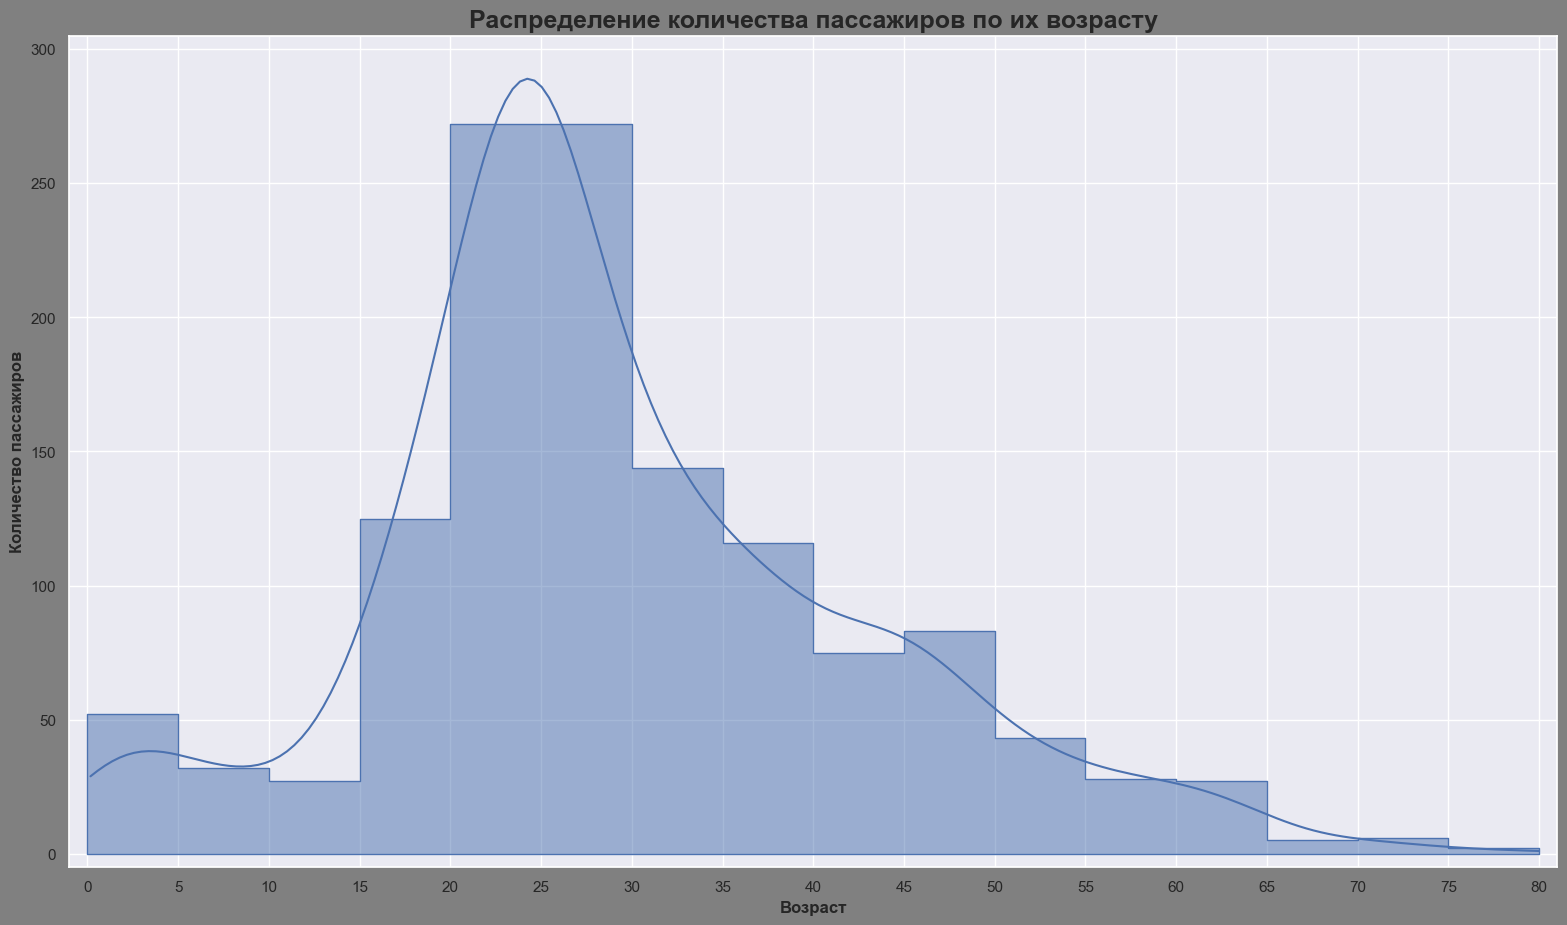

In [66]:
ttl = 'Распределение количества пассажиров по их возрасту'

plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')
sns.histplot(data = tit3, x = 'Age', kde=True, binwidth = 5,
             element="step", binrange = [0, 80])

plt.title(ttl, fontsize = 18, fontweight = 'bold')

plt.xlabel('Возраст', fontweight = 'bold')
plt.ylabel('Количество пассажиров', fontweight = 'bold')

plt.xlim(-1, 81)
plt.ylim(-5, 305)

plt.xticks(range(0, 82, 5))
plt.yticks(range(0, 302, 50))

#plt.savefig(f'savefig/{time.strftime("%Y%m%d-%H%M%S")} - {ttl}.png')
plt.show()

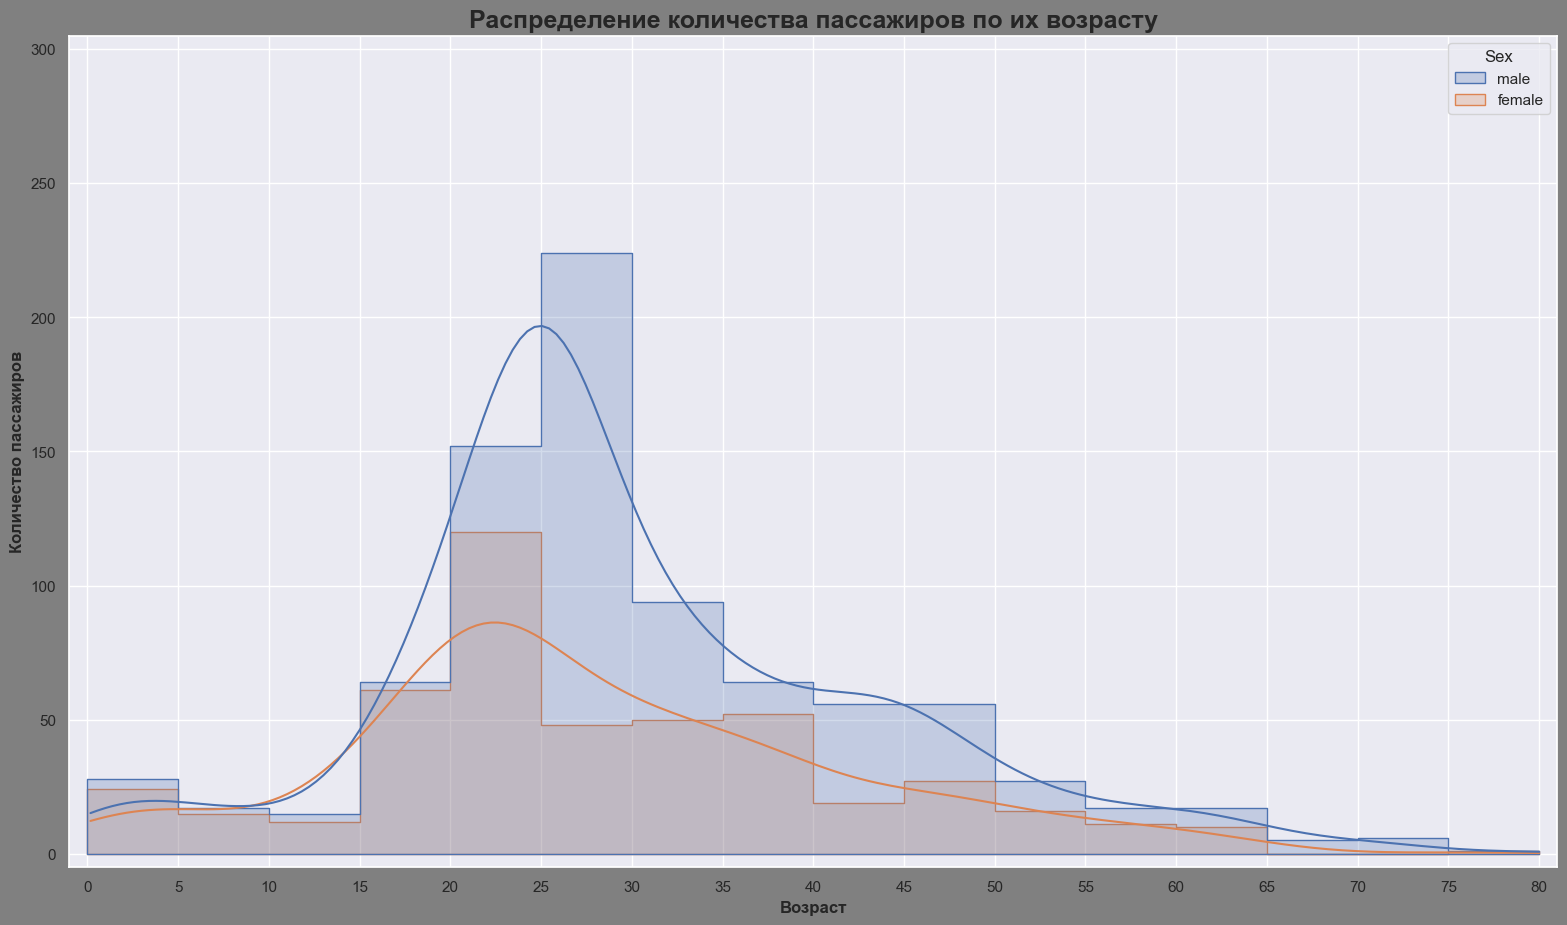

In [67]:
ttl = 'Распределение количества пассажиров по их возрасту'

plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')
sns.histplot(data = tit3, x = 'Age', kde=True, binwidth = 5, hue = 'Sex',
             element="step", binrange = [0, 80])

plt.title(ttl, fontsize = 18, fontweight = 'bold')

plt.xlabel('Возраст', fontweight = 'bold')
plt.ylabel('Количество пассажиров', fontweight = 'bold')

plt.xlim(-1, 81)
plt.ylim(-5, 305)

plt.xticks(range(0, 82, 5))
plt.yticks(range(0, 302, 50))

#plt.savefig(f'savefig/{time.strftime("%Y%m%d-%H%M%S")} - {ttl}.png')
plt.show()

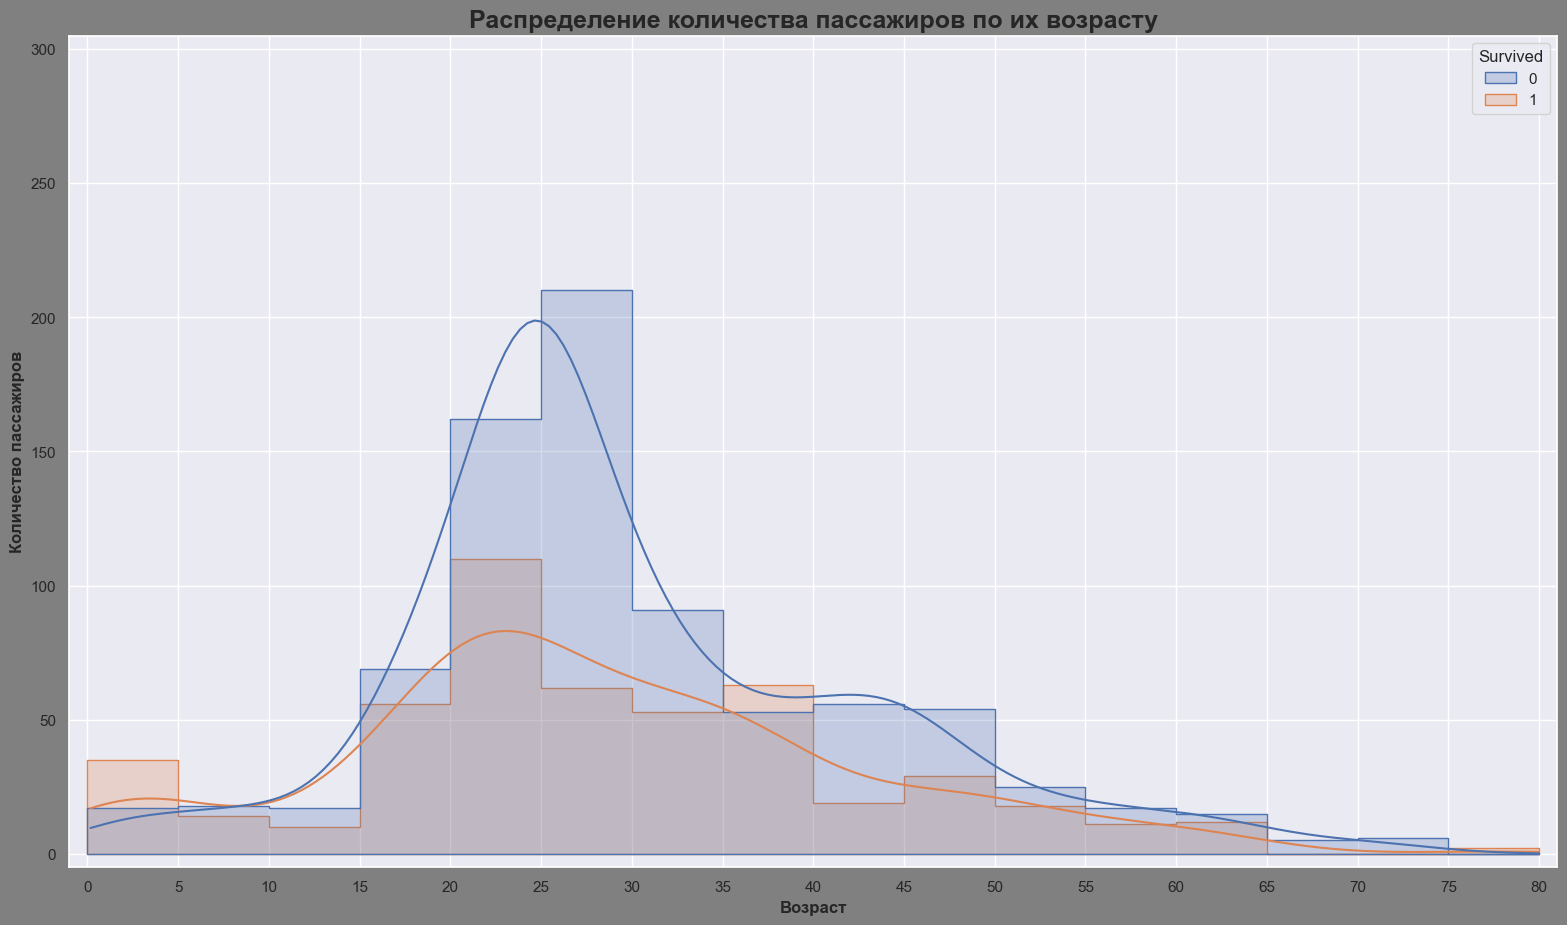

In [68]:
ttl = 'Распределение количества пассажиров по их возрасту'

plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')
sns.histplot(data = tit3, x = 'Age', kde=True, binwidth = 5, hue = 'Survived',
             element="step", binrange = [0, 80])

plt.title(ttl, fontsize = 18, fontweight = 'bold')

plt.xlabel('Возраст', fontweight = 'bold')
plt.ylabel('Количество пассажиров', fontweight = 'bold')

plt.xlim(-1, 81)
plt.ylim(-5, 305)

plt.xticks(range(0, 82, 5))
plt.yticks(range(0, 302, 50))

#plt.savefig(f'savefig/{time.strftime("%Y%m%d-%H%M%S")} - {ttl}.png')
plt.show()

In [69]:
priznak_1(tit3, ['Type_age'])

_______________________________________



,Type_age,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,1,35,2.67,22,62.86,1.68
1,2,29,2.22,20,68.97,1.53
2,3,24,1.83,8,33.33,0.61
3,4,77,5.88,36,46.75,2.75
4,5,615,46.98,201,32.68,15.36
5,6,489,37.36,193,39.47,14.74
6,7,40,3.06,14,35.00,1.07


In [70]:
priznak_2(tit3, ['Type_age'], ['Sex', 'Pclass', 'Embarked'])

_______________________________________



,Type_age,Sex,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,1,female,16,1.22,12,75.00,0.92
1,1,male,19,1.45,10,52.63,0.76
2,2,female,14,1.07,12,85.71,0.92
3,2,male,15,1.15,8,53.33,0.61
4,3,female,11,0.84,5,45.45,0.38
5,3,male,13,0.99,3,23.08,0.23
6,4,female,40,3.06,32,80.00,2.44
7,4,male,37,2.83,4,10.81,0.31
8,5,female,199,15.20,164,82.41,12.53
9,5,male,416,31.78,37,8.89,2.83


_______________________________________



,Type_age,Pclass,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,1,1,2,0.15,1,50.00,0.08
1,1,2,11,0.84,10,90.91,0.76
2,1,3,22,1.68,11,50.00,0.84
3,2,1,2,0.15,1,50.00,0.08
4,2,2,8,0.61,8,100.00,0.61
5,2,3,19,1.45,11,57.89,0.84
6,3,1,0,0.00,0,0.00,0.00
7,3,2,5,0.38,4,80.00,0.31
8,3,3,19,1.45,4,21.05,0.31
9,4,1,11,0.84,9,81.82,0.69


_______________________________________



,Type_age,Embarked,Кол-во,%,Выжило по признаку,% по признаку,% от всех пассажиров
0,1,C,7,0.53,7,100.00,0.53
1,1,Q,1,0.08,0,0.00,0.00
2,1,S,27,2.06,15,55.56,1.15
3,2,C,5,0.38,3,60.00,0.23
4,2,Q,1,0.08,0,0.00,0.00
5,2,S,23,1.76,17,73.91,1.30
6,3,C,3,0.23,1,33.33,0.08
7,3,Q,3,0.23,0,0.00,0.00
8,3,S,18,1.38,7,38.89,0.53
9,4,C,26,1.99,17,65.38,1.30


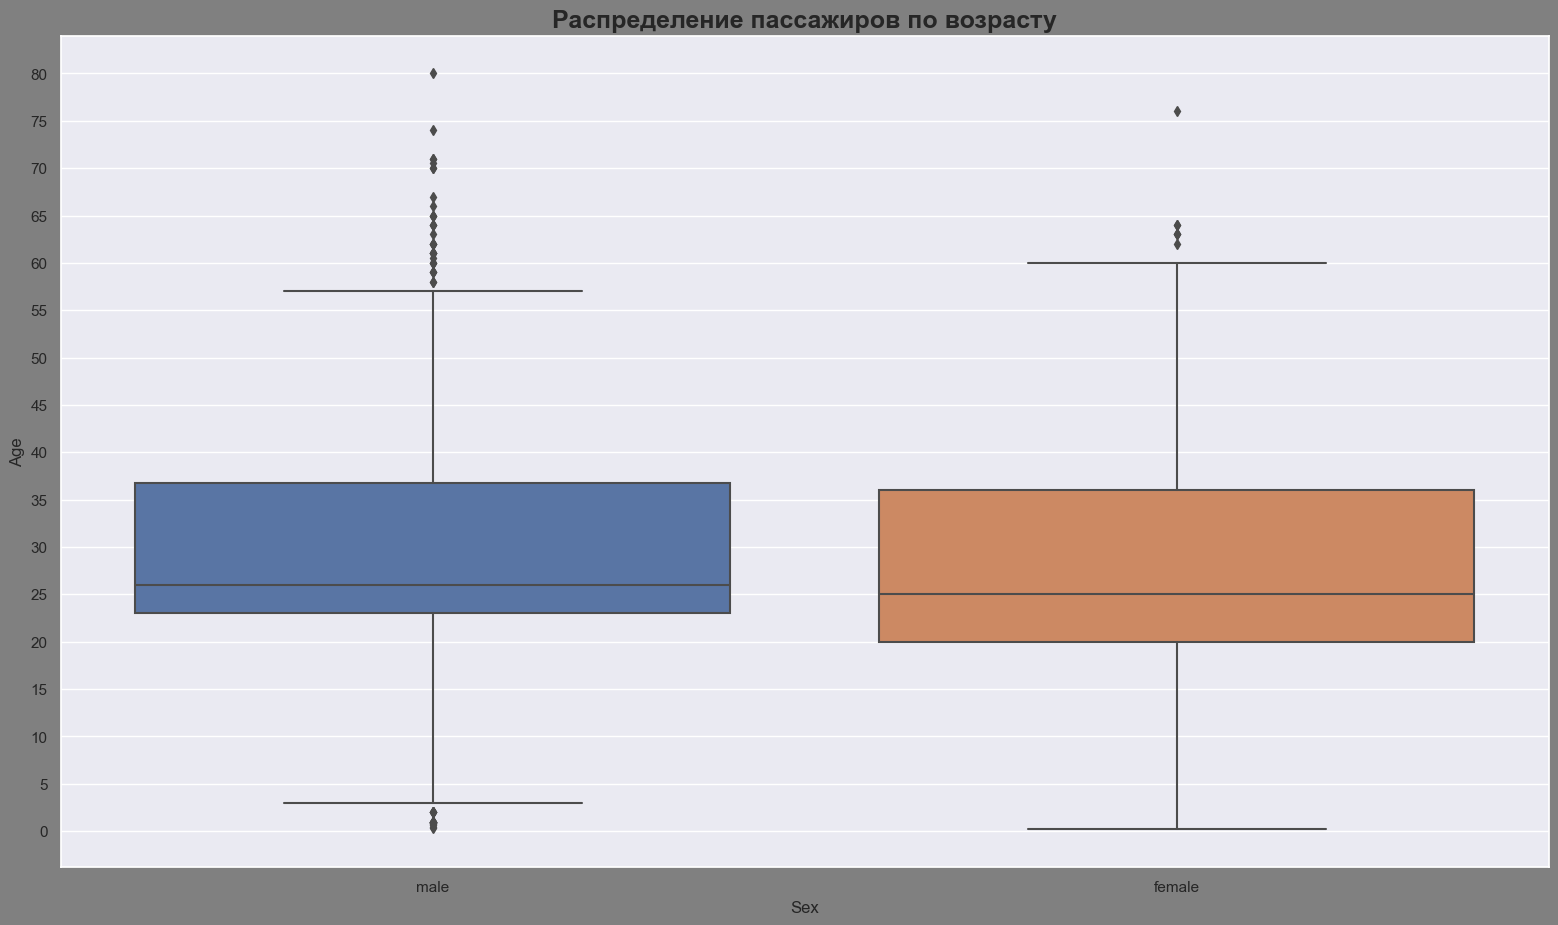

In [71]:
ttl = 'Распределение пассажиров по возрасту'
plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')
sns.boxplot(x = 'Sex', y = 'Age', data = tit3)
plt.title(ttl, fontsize = 18, fontweight = 'bold')
plt.yticks(range(0, 82, 5))
#plt.savefig(f'savefig/{time.strftime("%Y%m%d-%H%M%S")} - {ttl}.png')
plt.show()

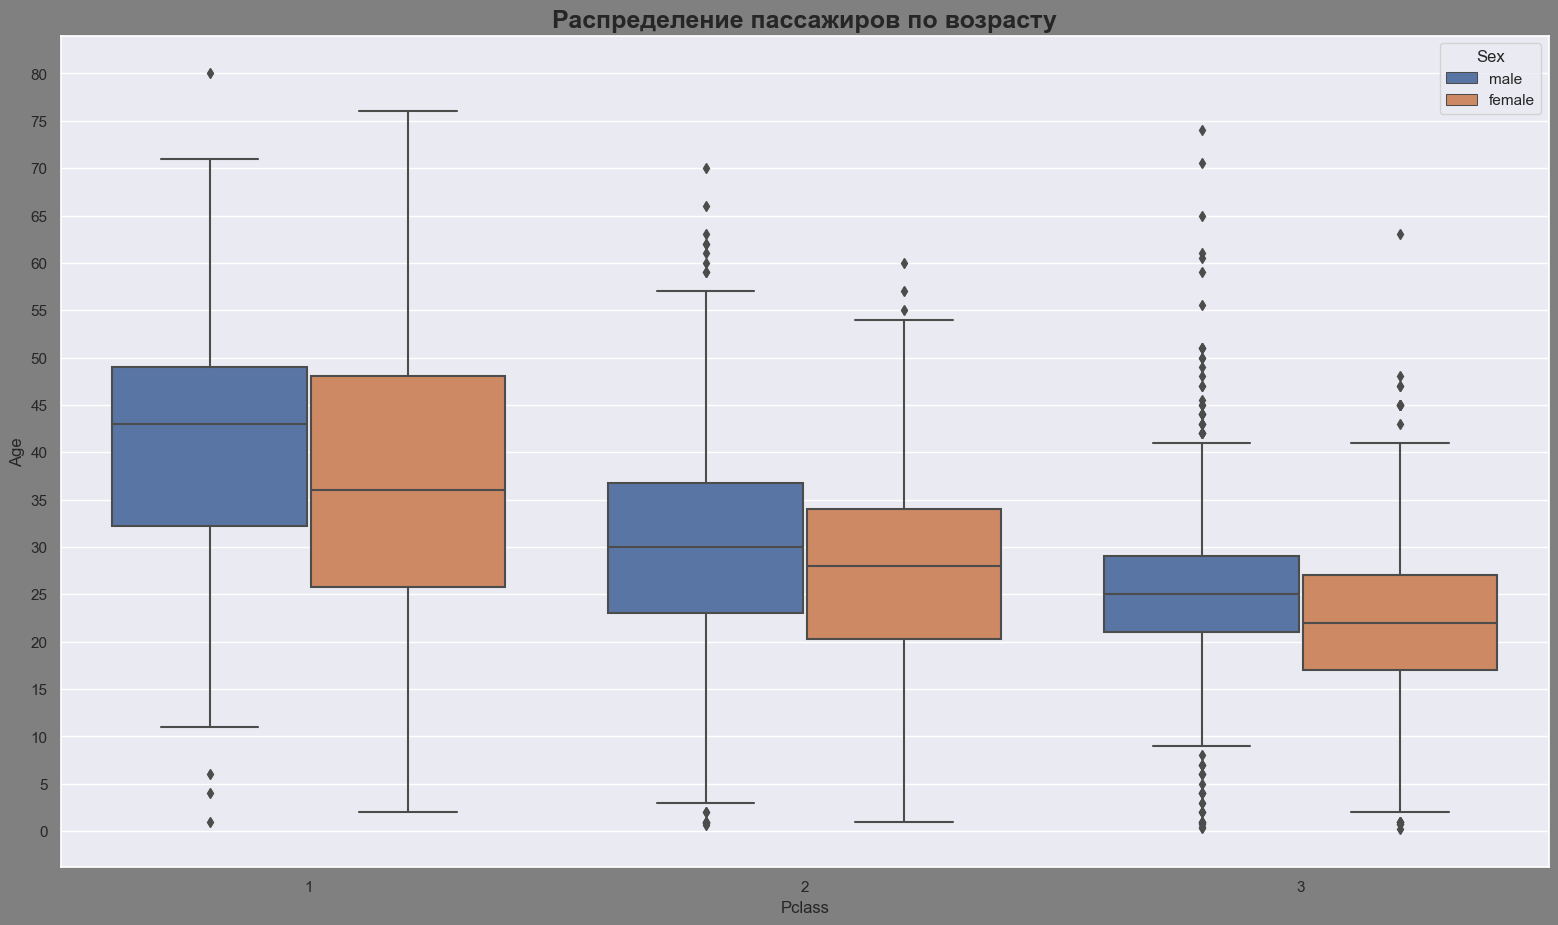

In [72]:
ttl = 'Распределение пассажиров по возрасту'
plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')
sns.boxplot(x = 'Pclass', y = 'Age', data = tit3, hue = 'Sex')
plt.title(ttl, fontsize = 18, fontweight = 'bold')
plt.yticks(range(0, 82, 5))
#plt.savefig(f'savefig/{time.strftime("%Y%m%d-%H%M%S")} - {ttl}.png')
plt.show()

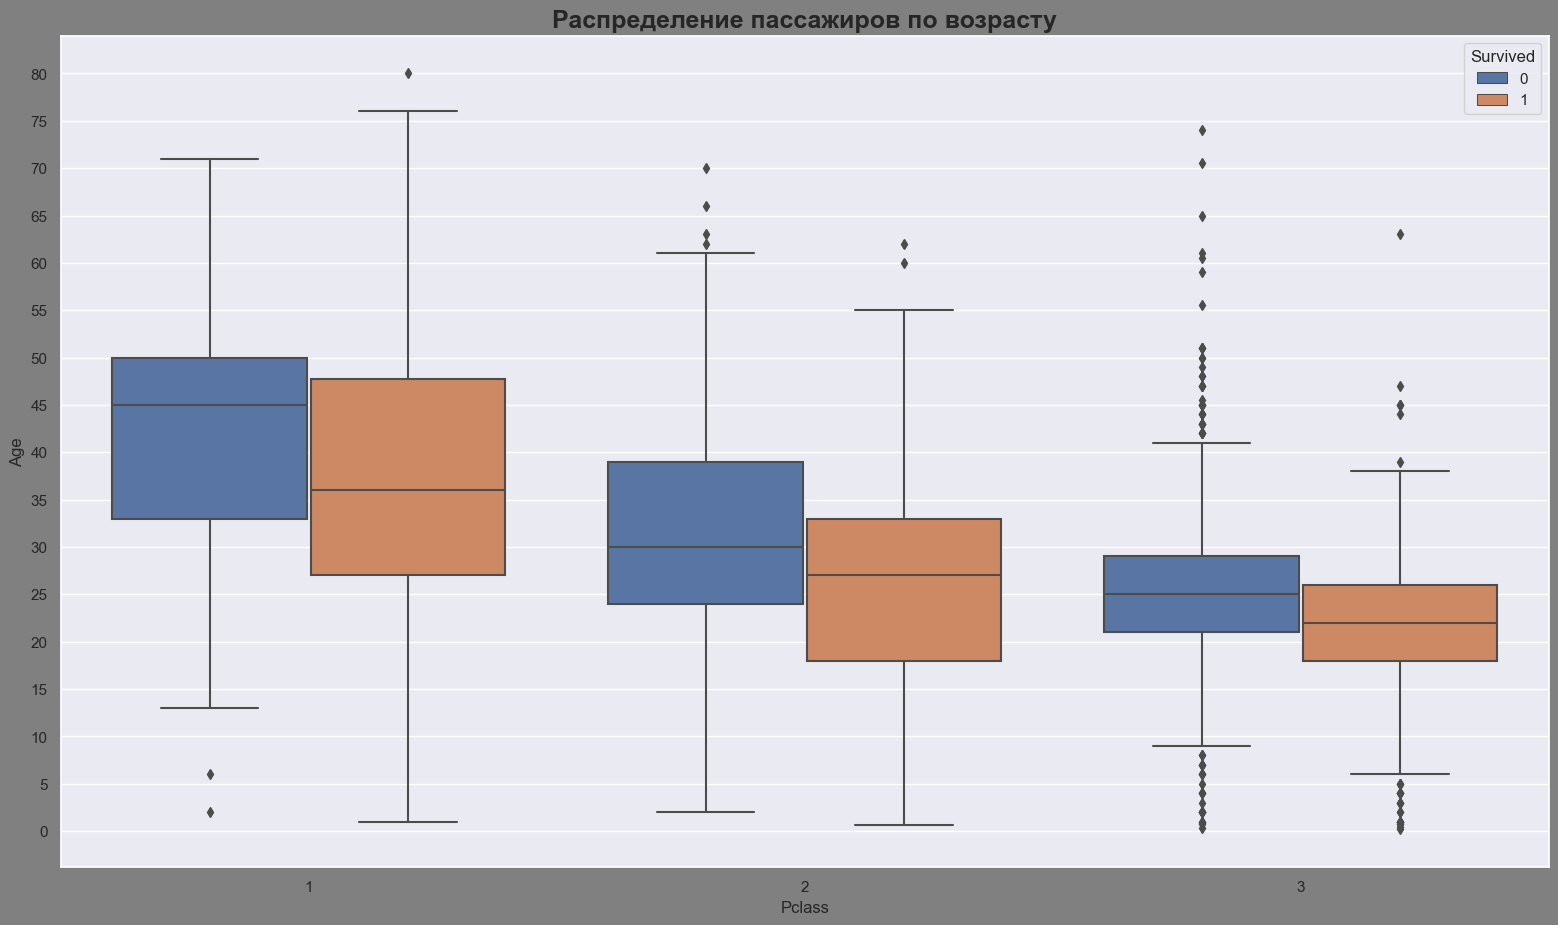

In [73]:
ttl = 'Распределение пассажиров по возрасту'
plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')
sns.boxplot(x = 'Pclass', y = 'Age', data = tit3, hue = 'Survived')
plt.title(ttl, fontsize = 18, fontweight = 'bold')
plt.yticks(range(0, 82, 5))
#plt.savefig(f'savefig/{time.strftime("%Y%m%d-%H%M%S")} - {ttl}.png')
plt.show()

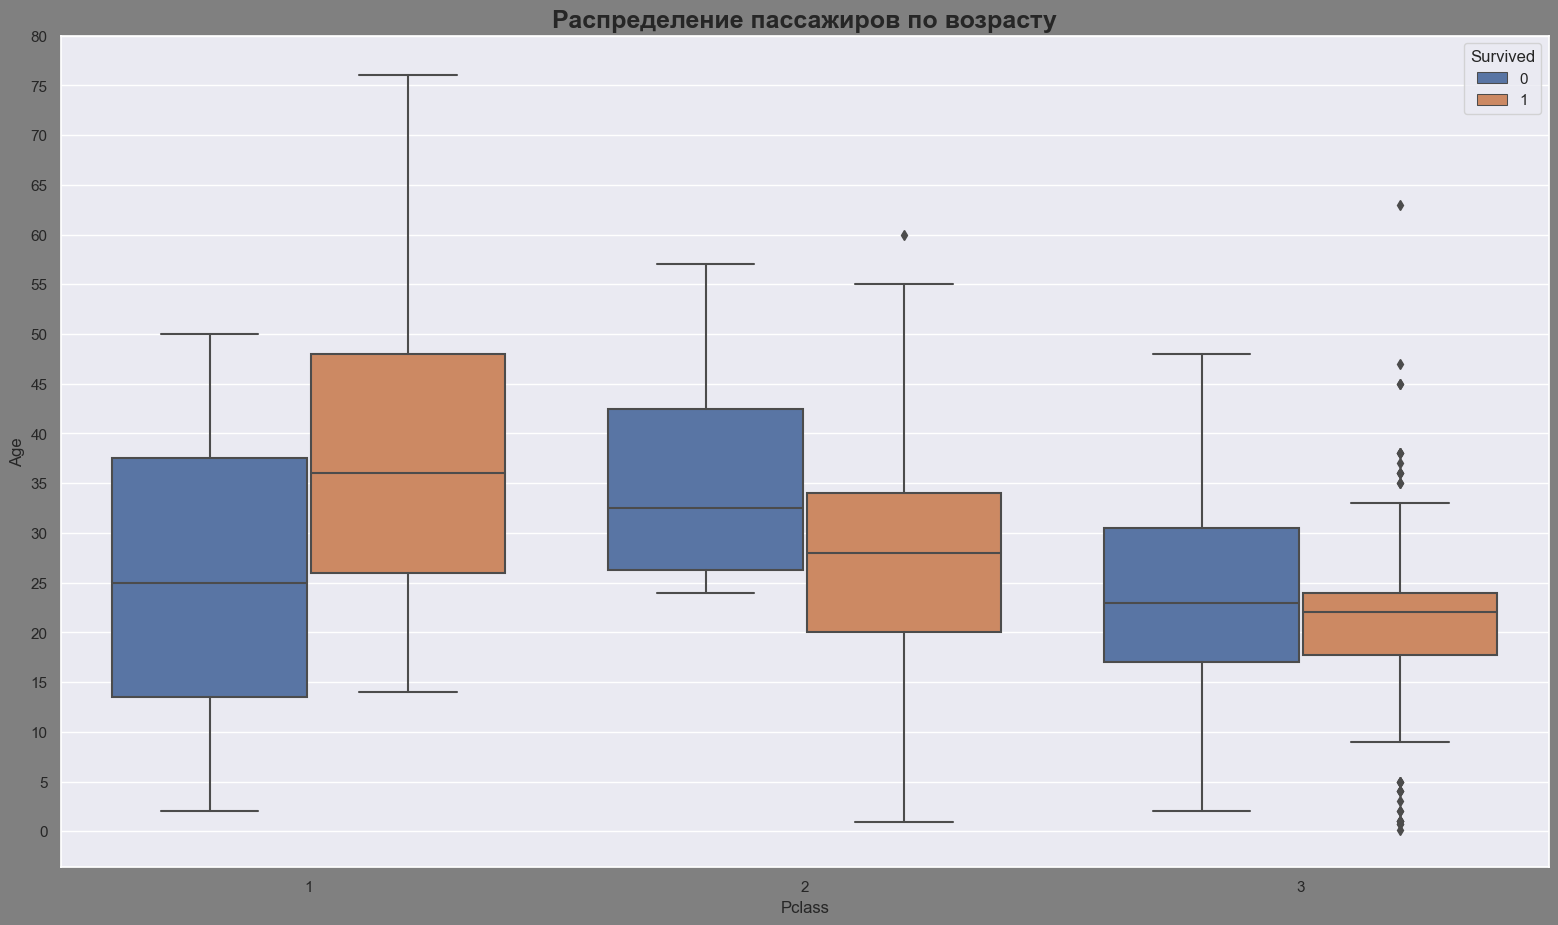

In [74]:
ttl = 'Распределение пассажиров по возрасту'
plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')
sns.boxplot(x = 'Pclass', y = 'Age', data = tit3[tit3['Sex'] == 'female'],
            hue = 'Survived')
plt.title(ttl, fontsize = 18, fontweight = 'bold')
plt.yticks(range(0, 82, 5))
#plt.savefig(f'savefig/{time.strftime("%Y%m%d-%H%M%S")} - {ttl}.png')
plt.show()

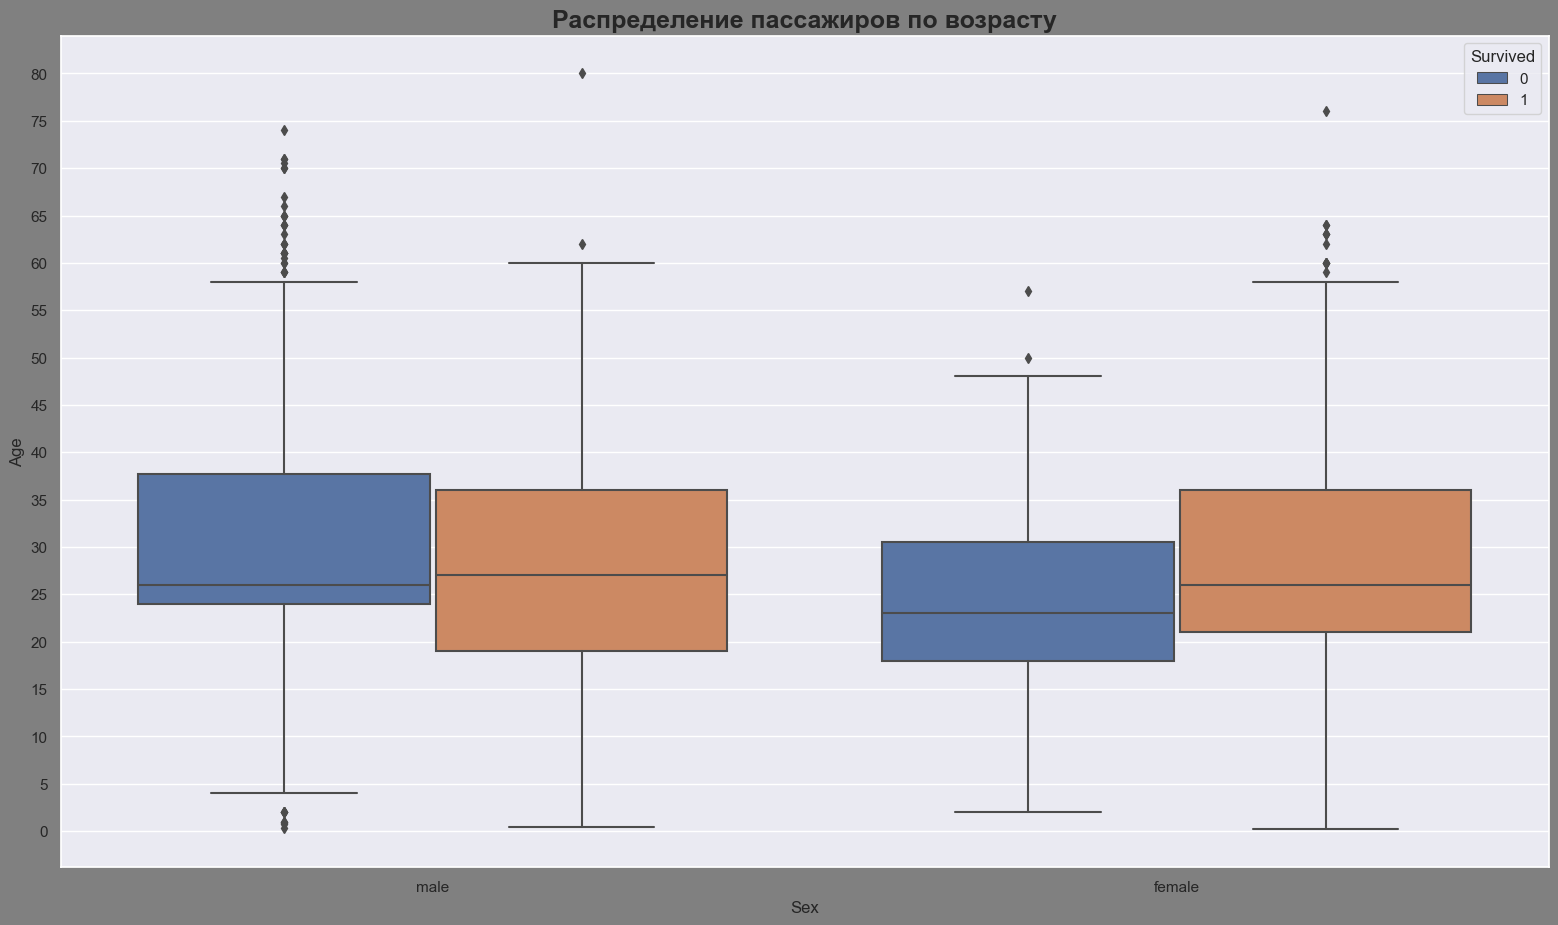

In [75]:
ttl = 'Распределение пассажиров по возрасту'
plt.figure(figsize=[19.2, 10.8], facecolor = 'grey')
sns.boxplot(x = 'Sex', y = 'Age', data = tit3, hue = 'Survived')
plt.title(ttl, fontsize = 18, fontweight = 'bold')
plt.yticks(range(0, 82, 5))
#plt.savefig(f'savefig/{time.strftime("%Y%m%d-%H%M%S")} - {ttl}.png')
plt.show()

---

Рассмотрев пассажиров с распределением по возрасту, мы можем сделать следующие выводы:

В основном на Титанике были молодые люди (от 18 до 30 лет) – 615 пассажиров, из их выжили 201 человек, это самый маленький процент выживания по группе – всего 32.68%. Из них было 199 женщин и 416 мужчин, выжило 164 и 37 соответственно. У мужчин в этом возрасте был самый маленький процент выживания 8.89%.

По графикам распределения количества пассажиров по возрасту мы видим, что на борту в основном были мужчины в возрасте от 23 до 37 лет, а женщины от 20 до 35 лет. Более наглядно видно разницу по возрасту по классам обслуживания, первый класс предпочитали более взрослые люди, а третий более молодые. Таже хорошо прослеживается, что женщины в основном были моложе примерно на 3 - 5 лет.

Причем мы можем наблюдать очень интересный факт – в первом классе смогли спастись более взрослые женщины, а во втором классе более молодые женщины. По третьему классу такой сильной разнице не наблюдается.

---

Из ранее подготовленных дата сэтов выгрузим данные для дальнейшей работы с ними в ноутбуке Titanic-ML, где рассмотрим обучение нескольких моделей.

---

In [76]:
tit2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_median,Age_mean,Age_mode,Fare_mode
0,1,0,3,male,22.0,1,0,S,22.0,22.000000,22.0,7.2500
1,2,1,1,female,38.0,1,0,C,38.0,38.000000,38.0,71.2833
2,3,1,3,female,26.0,0,0,S,26.0,26.000000,26.0,7.9250
3,4,1,1,female,35.0,1,0,S,35.0,35.000000,35.0,53.1000
4,5,0,3,male,35.0,0,0,S,35.0,35.000000,35.0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,male,NaN,0,0,S,25.0,26.516962,21.0,8.0500
1305,1306,1,1,female,39.0,0,0,C,39.0,39.000000,39.0,108.9000
1306,1307,0,3,male,38.5,0,0,S,38.5,38.500000,38.5,7.2500
1307,1308,0,3,male,NaN,0,0,S,25.0,26.516962,21.0,8.0500


In [79]:
info(tit2, 0)

----------------------------------------------------------------------------------------
Количество данных      - 1309
----------------------------------------------------------------------------------------
Количество дубликатов  - 0
----------------------------------------------------------------------------------------


,Колонка,Кол-во уникальных значений,Кол-во дубликатов,Кол-во пропусков,% пропусков,Тип данных
0,PassengerId,1309,0,0,0.00,int64
1,Survived,2,1307,0,0.00,int64
2,Pclass,3,1306,0,0.00,int64
3,Sex,2,1307,0,0.00,object
4,Age,99,1210,263,20.09,float64
5,SibSp,7,1302,0,0.00,int64
6,Parch,8,1301,0,0.00,int64
7,Embarked,3,1306,0,0.00,object
8,Age_median,101,1208,0,0.00,float64
9,Age_mean,120,1189,0,0.00,float64


In [80]:
print(list(tit2))

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Age_median', 'Age_mean', 'Age_mode', 'Fare_mode']


In [117]:
tit4 = tit2[['Survived', 'Sex', 'Pclass', 'Age', 'Age_median', 'Age_mean', 'Age_mode', 'Fare_mode', 'SibSp', 'Parch', 'Embarked']]
tit4.rename(columns = {'Fare_mode':'Fare'}, inplace = True)
tit4['Sex'] = tit4['Sex'].map({'male':1, 'female':0})
tit4.to_csv('data/tit.csv', index = False)

C:\Users\sava_\AppData\Local\Temp\ipykernel_7536\1520280231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tit4.rename(columns = {'Fare_mode':'Fare'}, inplace = True)
C:\Users\sava_\AppData\Local\Temp\ipykernel_7536\1520280231.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tit4['Sex'] = tit4['Sex'].map({'male':1, 'female':0})
